In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

https://www.kaggle.com/code/rafjaa/dealing-with-very-small-datasets#t1

https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import run_ML_classification as ml

# load the data

In [4]:
os.listdir()

['reference_final.xlsx',
 'shading_reference_10cc.xlsx',
 '10CC_reference_to_model_per_strain_shuffle.ipynb',
 'monte_predicted_classes.csv.gz',
 'shading_reference_ccpa.xlsx',
 'model_store_compare_additional_het.ipynb',
 'features_monte_ponly_clean.csv.gz',
 'monte_het_predicted_classes.csv.gz',
 'model_store_analyze_features.ipynb',
 'features_monte_ponly_add_OVERFLOW.csv.gz',
 'monte_OVERFLOW_fix_predicted_classes.csv.gz',
 '10CC_ML_classifier.joblib',
 'reference_10cc_all.xlsx',
 'reference_pro99_axenic.xlsx',
 'reference_10cc.xlsx',
 'model_store_compare_RMSE_OVERFLOW_fix.ipynb',
 '10CC model build refactor.ipynb',
 'features_monte_add_ponly_clean.csv.gz',
 'features_monte_add_het_clean.csv.gz',
 'model_store_compare_RMSE_model.ipynb',
 '10CC_reference_to_model.ipynb',
 '10CC_reference_to_model_test_train.ipynb',
 'model_store_compare_OVERFLOW_fix.ipynb',
 'monte_ponly_predicted_classes.csv.gz',
 'problematic_runids_het.txt',
 'features_monte_het_clean.csv.gz',
 '10CC_reference_t

In [5]:
refdf_10cc = pd.read_excel('shading_reference_10cc.xlsx')
refdf_ccpa = pd.read_excel('shading_reference_ccpa.xlsx')
refdf_yara = pd.read_excel('shading_reference_yara_axenic.xlsx')


In [6]:
refdf_yara = refdf_yara.loc[~refdf_yara.strain.isin(['ctrl'])].copy()

In [7]:
refdf_yara.Group.value_counts()

Group
Axenic_Other    14427
Axenic            681
Name: count, dtype: int64

In [8]:
refdf_10cc['Experiment'] = '10CC'
refdf_ccpa['Experiment'] = '5x5'
refdf_yara['Experiment'] = 'Axenic_media'


In [9]:
refdf_ccpa[['Group', 'id','full name',  ]].value_counts()
#[~refdf_ccpa['train_Group'].isin(['Other'])]

Group         id              full name             
Strong_Other  MIT0604_DE1     A. mediterranea AltDE1    1338
Strong        MED4_DE1        A. mediterranea AltDE1    1338
Strong_Other  Natl2A_BS11     A. macleodii BS11         1338
              Natl2A_ATCC     A. macleodii ATCC27126    1338
              Natl2A_1A3      A. macleodii HOT1A3       1338
              MIT9313_DE1     A. mediterranea AltDE1    1338
              MIT9312_DE      A. mediterranea AltDE     1338
              MIT9312_1A3     A. macleodii HOT1A3       1338
              MIT0604_DE      A. mediterranea AltDE     1338
              MIT0604_1A3     A. macleodii HOT1A3       1338
              Natl2A_DE1      A. mediterranea AltDE1    1338
Strong        MED4_DE         A. mediterranea AltDE     1338
Other         all_all         Axenic                    1338
Strong_Other  MIT9313_DE      A. mediterranea AltDE     1284
              MIT9313_BS11    A. macleodii BS11         1284
              MIT9312_DE1     A.

In [10]:
refdf_ccpa.groupby('transfer').day.max()

transfer
0    140.708333
2     39.870000
3    140.930000
4    140.900000
5    120.900000
6    122.760000
7    122.750000
Name: day, dtype: float64

In [11]:
refdf_10cc.groupby('transfer').day.max()

transfer
0    128.767361
Name: day, dtype: float64

In [12]:
refdf_ccpa.groupby('Sample').day.max().value_counts()

day
140.708333    91
39.870000     78
140.900000    77
122.750000    76
140.930000    74
122.760000    70
120.900000    69
Name: count, dtype: int64

In [13]:
refdf_yara.groupby('Sample').day.max().value_counts()

day
89.879861     72
90.987500     72
93.918056     60
90.951389     48
114.788194    12
Name: count, dtype: int64

In [14]:
refdf_10cc.groupby('Sample').day.max().value_counts()

day
128.767361    30
Name: count, dtype: int64

In [15]:
refdf_10cc.loc[refdf_10cc.transfer.isin([0])].day.unique()

array([  0.        ,   1.08194444,   2.16458333,   2.74722222,
         3.75416667,   4.70138889,   5.72013889,   6.73194444,
         7.98402778,   8.94375   ,   9.74583333,  10.83472222,
        11.71805556,  12.83055556,  13.69583333,  16.14097222,
        16.72708333,  17.72708333,  18.71180556,  19.71111111,
        20.77847222,  21.88055556,  23.89861111,  25.73472222,
        26.74722222,  27.85277778,  29.78402778,  31.07638889,
        31.81805556,  32.77916667,  33.73611111,  34.77083333,
        36.90277778,  37.78888889,  39.90833333,  40.84444444,
        41.83472222,  44.75902778,  46.79444444,  47.91875   ,
        48.81041667,  49.90763889,  51.78402778,  53.00208333,
        54.79375   ,  58.8375    ,  59.91180556,  62.89236111,
        65.65138889,  66.99305556,  67.98402778,  69.80208333,
        72.775     ,  73.76875   ,  76.93958333,  79.79513889,
        80.88888889,  81.95833333,  84.21875   ,  86.89236111,
        87.79444444,  88.74861111,  91.        ,  93.78

In [16]:
refdf = pd.concat([refdf_10cc, refdf_ccpa, refdf_yara], ignore_index=True)

In [17]:
refdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,0.459701,3.045517,10CC,NaN,NaN,NaN,NaN,NaN
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,0.687381,4.553901,10CC,NaN,NaN,NaN,NaN,NaN
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,0.978455,6.482263,10CC,NaN,NaN,NaN,NaN,NaN
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,1.556327,10.310666,10CC,NaN,NaN,NaN,NaN,NaN
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,2.334899,15.468703,10CC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51738,Ax_Media_D60,NATL1A_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_NATL1A_lowP(1:50),Axenic_Other,6917400.0,80.062500,0.005,0.023219,0.153826,Axenic_media,NaN,NaN,NATL1A,lowP(1:50),26005.304177
51739,Ax_Media_D60,NATL1A_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_NATL1A_lowP(1:50),Axenic_Other,7251600.0,83.930556,0.019,0.088232,0.584539,Axenic_media,NaN,NaN,NATL1A,lowP(1:50),98820.155874
51740,Ax_Media_D60,NATL1A_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_NATL1A_lowP(1:50),Axenic_Other,7412820.0,85.796528,0.034,0.157889,1.046017,Axenic_media,NaN,NaN,NATL1A,lowP(1:50),176836.068405
51741,Ax_Media_D60,NATL1A_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_NATL1A_lowP(1:50),Axenic_Other,7942080.0,91.922222,0.029,0.134670,0.892191,Axenic_media,NaN,NaN,NATL1A,lowP(1:50),150830.764228


In [18]:
refdf.Group.unique()

array(['Weak', 'Axenic', 'Strong', 'Inhibited', 'Sustained', nan,
       'Strong_Other', 'Axenic_Other', 'Other'], dtype=object)

In [19]:
refdf = refdf.loc[~(refdf.Group.isin(['Strong_Other']) & refdf.transfer.isin([0]))].copy()

In [20]:
refdf['train_Group'] = refdf['Group']
refdf.loc[~refdf.transfer.isin([0]), 'train_Group'] = 'Other'
#refdf.loc[~refdf.PRO.isin(['MED4']), 'train_Group'] = 'Other'
refdf.loc[refdf.Group.isin(['Axenic_Other', 'Strong_Other']), 'train_Group'] = 'Other'
refdf.loc[refdf.Group.isin(['Inhibited']), 'train_Group'] = 'Inhibited'


In [21]:
# remove all Other samples of 5x5 - too close to the phenotypes we want to keep
refdf = refdf.loc[~(refdf.Experiment.isin(['5x5']) & refdf.train_Group.isin(['Other']))]

In [22]:

refdf.loc[refdf.id.isin(['MED4_lowN']), 'train_Group']  = 'Axenic'


In [23]:
refdf.train_Group.value_counts()

train_Group
Other        14427
Strong        1764
Axenic        1167
Weak           444
Inhibited      444
Sustained      444
Name: count, dtype: int64

In [24]:
refdf.groupby(['train_Group', 'Group', 'id','full name',  ]).size().head(50)
#[~refdf_ccpa['train_Group'].isin(['Other'])]

train_Group  Group         id                  full name                  
Axenic       Axenic        1                   Axenic                         222
                           MED4_Ax_Pro         Axenic                         264
                           MED4_lowN           Axenic_MED4_lowN               681
Inhibited    Inhibited     3                   Marinobacter adhaerens HP15    222
                           4                   Phaeobacter gallaeciensis      222
Other        Axenic_Other  1314_Pro99          Axenic_1314_Pro99              174
                           1314_lowN           Axenic_1314_lowN               174
                           1314_lowP(1:50)     Axenic_1314_lowP(1:50)         174
                           1314_lowP(1:8)      Axenic_1314_lowP(1:8)          174
                           1327_Pro99          Axenic_1327_Pro99              180
                           1327_lowN           Axenic_1327_lowN               180
                       

In [25]:
refdf.groupby(['train_Group', 'Group', 'id','full name',  ]).size().tail(50)
#[~refdf_ccpa['train_Group'].isin(['Other'])]

train_Group  Group         id                  full name                     
Other        Axenic_Other  9313_Pro99          Axenic_9313_Pro99                 180
                           9313_lowN           Axenic_9313_lowN                  180
                           9313_lowP(1:50)     Axenic_9313_lowP(1:50)            180
                           9313_lowP(1:8)      Axenic_9313_lowP(1:8)             180
                           9515_Pro99          Axenic_9515_Pro99                 171
                           9515_lowN           Axenic_9515_lowN                  171
                           9515_lowP(1:50)     Axenic_9515_lowP(1:50)            171
                           9515_lowP(1:8)      Axenic_9515_lowP(1:8)             171
                           AS9601_Pro99        Axenic_AS9601_Pro99               171
                           AS9601_lowN         Axenic_AS9601_lowN                171
                           AS9601_lowP(1:50)   Axenic_AS9601_lowP(1:50) 

In [26]:
refdf.Sample.nunique()

312

In [27]:
refdf.Group.unique()

array(['Weak', 'Axenic', 'Strong', 'Inhibited', 'Sustained', nan,
       'Axenic_Other'], dtype=object)

In [28]:
refdf_10cc.Sample.nunique(), refdf_yara.Sample.nunique(), refdf_ccpa.Sample.nunique()


(30, 264, 535)

In [29]:
groupby_cols = [ 'Sample', 'id',  'full name',  'Group',]
refdf[groupby_cols].value_counts().groupby('Group').size()

Group
Axenic           18
Axenic_Other    252
Inhibited         6
Strong           21
Sustained         6
Weak              6
Name: count, dtype: int64

In [30]:
groupby_cols = [ 'Sample', 'id',  'full name',  'train_Group',]
refdf[groupby_cols].value_counts().groupby('train_Group').size()

train_Group
Axenic        18
Inhibited      6
Other        252
Strong        21
Sustained      6
Weak           6
Name: count, dtype: int64

In [31]:
refdf['full name'].unique()

array(['Marinovum 5F3', 'Roseovarius 5C3', 'Axenic', 'A. macleodii 1A3',
       'Marinobacter adhaerens HP15', 'Phaeobacter gallaeciensis',
       'Pseudoalteromonas haloplanktis', 'Ruegeria pomeroyi',
       'Sulfitobacter pseudonitzschiae', 'E. coli', 'A. macleodii HOT1A3',
       'A. mediterranea AltDE', 'A. mediterranea AltDE1',
       'A. macleodii BS11', 'A. macleodii ATCC27126', 'Axenic_MED4_Pro99',
       'Axenic_MED4_lowN', 'Axenic_MED4_lowP(1:8)',
       'Axenic_MED4_lowP(1:50)', 'Axenic_9312_Pro99', 'Axenic_9312_lowN',
       'Axenic_9312_lowP(1:8)', 'Axenic_9312_lowP(1:50)',
       'Axenic_9313_Pro99', 'Axenic_9313_lowN', 'Axenic_9313_lowP(1:8)',
       'Axenic_9313_lowP(1:50)', 'Axenic_1327_Pro99', 'Axenic_1327_lowN',
       'Axenic_1327_lowP(1:8)', 'Axenic_1327_lowP(1:50)',
       'Axenic_MIT0604_Pro99', 'Axenic_MIT0604_lowN',
       'Axenic_MIT0604_lowP(1:8)', 'Axenic_MIT0604_lowP(1:50)',
       'Axenic_NATL2A_Pro99', 'Axenic_NATL2A_lowN',
       'Axenic_NATL2A_lowP(1:8)

In [32]:
refdf.head()

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,0.459701,3.045517,10CC,NaN,NaN,NaN,NaN,NaN,Weak
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,0.687381,4.553901,10CC,NaN,NaN,NaN,NaN,NaN,Weak
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,0.978455,6.482263,10CC,NaN,NaN,NaN,NaN,NaN,Weak
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,1.556327,10.310666,10CC,NaN,NaN,NaN,NaN,NaN,Weak
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,2.334899,15.468703,10CC,NaN,NaN,NaN,NaN,NaN,Weak


In [33]:
refdf.describe()

,transfer,transfer day,t,day,FL,ref_Bp[N],ref_Bp[C],predicted
count,3804.0,2220.0,1.891200e+04,18912.000000,18912.000000,18912.000000,18912.000000,1.510800e+04
mean,0.0,0.0,3.438501e+06,39.797470,0.719406,3.703340,24.534626,3.961635e+06
std,0.0,0.0,2.523254e+06,29.204332,1.309538,6.654336,44.084976,7.050391e+06
min,0.0,0.0,0.000000e+00,0.000000,-0.057000,-1.394905,-9.241243,-2.184446e+05
25%,0.0,0.0,1.381200e+06,15.986111,0.047000,0.222903,1.476730,2.236456e+05
50%,0.0,0.0,2.970420e+06,34.379861,0.131000,0.691927,4.584015,6.397305e+05
75%,0.0,0.0,5.086470e+06,58.871181,0.664000,3.642073,24.128736,3.984013e+06
max,0.0,0.0,1.215720e+07,140.708333,10.541000,95.435780,632.262040,4.948809e+07


In [34]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
       'Experiment', 'PRO', 'ALT', 'strain', 'media', 'predicted',
       'train_Group'],
      dtype='object')

In [35]:
refdf_10cc[['Group', 'id', 'full name']].value_counts()

Group      id  full name                     
Axenic     1   Axenic                            222
Inhibited  3   Marinobacter adhaerens HP15       222
           4   Phaeobacter gallaeciensis         222
Strong     2   A. macleodii 1A3                  222
           5   Pseudoalteromonas haloplanktis    222
Sustained  6   Ruegeria pomeroyi                 222
           7   Sulfitobacter pseudonitzschiae    222
Weak       10  Marinovum 5F3                     222
           11  Roseovarius 5C3                   222
Name: count, dtype: int64

In [36]:
# smaller initial number of heterotroph cells
#problematic_ids_not_enough_hets = [2,4,9]
# decided to add back inhibited sample
problematic_ids_not_enough_hets = [2,9]
refdf.loc[refdf.id.isin(problematic_ids_not_enough_hets)][['Group', 'id', 'full name']].value_counts()


Group   id  full name       
Strong  2   A. macleodii 1A3    222
Name: count, dtype: int64

In [37]:
refdf = refdf.loc[~refdf.id.isin(problematic_ids_not_enough_hets)].copy()


# interpolation to make all groups have the same timepoints

In [38]:
# only use the first 90 days because that's what we have from Yara
timepoints_10cc_transfer0 = refdf_10cc.loc[
    refdf_10cc.transfer.isin([0]), # & refdf_10cc.day.le(91), 
    'day'].unique()
timepoints_10cc_transfer0

array([  0.        ,   1.08194444,   2.16458333,   2.74722222,
         3.75416667,   4.70138889,   5.72013889,   6.73194444,
         7.98402778,   8.94375   ,   9.74583333,  10.83472222,
        11.71805556,  12.83055556,  13.69583333,  16.14097222,
        16.72708333,  17.72708333,  18.71180556,  19.71111111,
        20.77847222,  21.88055556,  23.89861111,  25.73472222,
        26.74722222,  27.85277778,  29.78402778,  31.07638889,
        31.81805556,  32.77916667,  33.73611111,  34.77083333,
        36.90277778,  37.78888889,  39.90833333,  40.84444444,
        41.83472222,  44.75902778,  46.79444444,  47.91875   ,
        48.81041667,  49.90763889,  51.78402778,  53.00208333,
        54.79375   ,  58.8375    ,  59.91180556,  62.89236111,
        65.65138889,  66.99305556,  67.98402778,  69.80208333,
        72.775     ,  73.76875   ,  76.93958333,  79.79513889,
        80.88888889,  81.95833333,  84.21875   ,  86.89236111,
        87.79444444,  88.74861111,  91.        ,  93.78

In [39]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
       'Experiment', 'PRO', 'ALT', 'strain', 'media', 'predicted',
       'train_Group'],
      dtype='object')

In [40]:
def interpolate_series(x):
    x1 = x[['day', 'ref_Bp[N]', 'ref_Bp[C]']].copy()
    x1.set_index('day', inplace=True)
    x1 = x1.reindex(x1.index.union(timepoints_10cc_transfer0))
    x1 = x1.interpolate(method='index',limit_direction='both')
    x1 = x1.reindex(timepoints_10cc_transfer0)    
    #x1.reset_index(inplace=True)
    return x1

In [41]:
refdf.isna().sum()

Sample              0
id                  0
replicate       16692
transfer        15108
transfer day    16692
heterotroph     16692
full name           0
Group               0
t                   0
day                 0
FL                  0
ref_Bp[N]           0
ref_Bp[C]           0
Experiment          0
PRO             16884
ALT             16884
strain           3360
media            3360
predicted        3360
train_Group         0
dtype: int64

In [42]:
groupby_cols = ['train_Group', 'Sample', 'id', 'full name', 'Group',
       'Experiment', ]
refdf_interpolate = refdf.groupby(groupby_cols).apply(interpolate_series)
refdf_interpolate.reset_index(inplace=True)

In [43]:
refdf_interpolate

,train_Group,Sample,id,full name,Group,Experiment,day,ref_Bp[N],ref_Bp[C]
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.000000,0.566544,3.753355
1,Axenic,1A0,1,Axenic,Axenic,10CC,1.081944,0.157889,1.046017
2,Axenic,1A0,1,Axenic,Axenic,10CC,2.164583,0.738365,4.891667
3,Axenic,1A0,1,Axenic,Axenic,10CC,2.747222,1.054144,6.983701
4,Axenic,1A0,1,Axenic,Axenic,10CC,3.754167,1.421004,9.414152
...,...,...,...,...,...,...,...,...,...
22639,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,110.943750,0.034275,0.227070
22640,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,115.845833,0.119236,0.789935
22641,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,118.788889,0.225253,1.492299
22642,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,121.777778,0.250849,1.661877


In [44]:
refdf_interpolate.day.nunique()

74

In [45]:
refdf_interpolate.isna().sum()

train_Group    0
Sample         0
id             0
full name      0
Group          0
Experiment     0
day            0
ref_Bp[N]      0
ref_Bp[C]      0
dtype: int64

# Write refdf final file for the final reference samples

In [46]:
refdf_interpolate['t'] = refdf_interpolate['day'] * 3600 * 24

In [47]:
refdf_interpolate.head()

,train_Group,Sample,id,full name,Group,Experiment,day,ref_Bp[N],ref_Bp[C],t
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.000000,0.566544,3.753355,0.0
1,Axenic,1A0,1,Axenic,Axenic,10CC,1.081944,0.157889,1.046017,93480.0
2,Axenic,1A0,1,Axenic,Axenic,10CC,2.164583,0.738365,4.891667,187020.0
3,Axenic,1A0,1,Axenic,Axenic,10CC,2.747222,1.054144,6.983701,237360.0
4,Axenic,1A0,1,Axenic,Axenic,10CC,3.754167,1.421004,9.414152,324360.0


In [48]:
refdf.head()

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,0.459701,3.045517,10CC,NaN,NaN,NaN,NaN,NaN,Weak
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,0.687381,4.553901,10CC,NaN,NaN,NaN,NaN,NaN,Weak
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,0.978455,6.482263,10CC,NaN,NaN,NaN,NaN,NaN,Weak
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,1.556327,10.310666,10CC,NaN,NaN,NaN,NaN,NaN,Weak
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,2.334899,15.468703,10CC,NaN,NaN,NaN,NaN,NaN,Weak


In [49]:
refdf_interpolate.loc[refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained'])
                     ][['train_Group', 'full name', 'id']].value_counts() /(3*74)

train_Group  full name                       id         
Axenic       Axenic_MED4_lowN                MED4_lowN      4.0
             Axenic                          1              1.0
                                             MED4_Ax_Pro    1.0
Inhibited    Marinobacter adhaerens HP15     3              1.0
             Phaeobacter gallaeciensis       4              1.0
Strong       A. macleodii ATCC27126          MED4_ATCC      1.0
             A. macleodii BS11               MED4_BS11      1.0
             A. macleodii HOT1A3             MED4_1A3       1.0
             A. mediterranea AltDE           MED4_DE        1.0
             A. mediterranea AltDE1          MED4_DE1       1.0
             Pseudoalteromonas haloplanktis  5              1.0
Sustained    Ruegeria pomeroyi               6              1.0
             Sulfitobacter pseudonitzschiae  7              1.0
Weak         Marinovum 5F3                   10             1.0
             Roseovarius 5C3                 11

In [50]:
refdf_interpolate.loc[refdf_interpolate.train_Group.isin(['Axenic'])
                     ][ 'id'].unique() 

array([1, 'MED4_Ax_Pro', 'MED4_lowN'], dtype=object)

In [51]:
refdf_interpolate.loc[
    refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained']) &
    refdf_interpolate['full name'].isin(['Marinobacter adhaerens HP15', 'Phaeobacter gallaeciensis', ]) 
    
                     ]['Sample'].unique()

array(['3A0', '3B0', '3C0', '4A0', '4B0', '4C0'], dtype=object)

In [52]:
# remove non-transfer 0 samples (inhibited)
samples_to_ignore = [
    '3A1', '3A2', '3A3', '3A4', '3A5', 
    '3B1', '3B2', '3B3', '3B4', '3B5', 
    '3C1', '3C2', '3C3', '3C4', '3C5',
    '4A1', '4A2', '4A3', '4A4', '4A5', 
    '4B1', '4B2', '4B3', '4B4', '4B5',
    '4C1', '4C2', '4C3', '4C4', '4C5',
]

refdf_final_df = refdf_interpolate.loc[
    refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained']) &
    ~refdf_interpolate['id'].isin(['MED4_Ax_Pro', 'MED4_lowN']) &
    ~refdf_interpolate['Sample'].isin(samples_to_ignore)    
                     ]
refdf_final_df[['Group', 'full name']].value_counts() / (3*74)

Group      full name                     
Axenic     Axenic                            1.0
Inhibited  Marinobacter adhaerens HP15       1.0
           Phaeobacter gallaeciensis         1.0
Strong     A. macleodii ATCC27126            1.0
           A. macleodii BS11                 1.0
           A. macleodii HOT1A3               1.0
           A. mediterranea AltDE             1.0
           A. mediterranea AltDE1            1.0
           Pseudoalteromonas haloplanktis    1.0
Sustained  Ruegeria pomeroyi                 1.0
           Sulfitobacter pseudonitzschiae    1.0
Weak       Marinovum 5F3                     1.0
           Roseovarius 5C3                   1.0
Name: count, dtype: float64

# Initial X and y

In [53]:
refdf_interpolate.columns

Index(['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
       'day', 'ref_Bp[N]', 'ref_Bp[C]', 't'],
      dtype='object')

In [54]:
# only use the first 90 days because that's what we have from Yara
groupby_cols = ['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment', ]

refdf_interpolate_clipped = ml.df2clipped(refdf_interpolate)

X = ml.df2X(refdf_interpolate_clipped, groupby_cols)

In [55]:
X

ref_Bp[C]  \
day                                                                0.000000    
train_Group Sample   id          full name       Group  Experiment             
Axenic      1A0      1           Axenic          Axenic 10CC        3.753355   
            1B0      1           Axenic          Axenic 10CC        1.999738   
            1C0      1           Axenic          Axenic 10CC        5.568502   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         4.522485   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         4.368659   
...                                                                      ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC        3.494856   
            10C0     10          Marinovum 5F3   Weak   10CC        5.392063   
            11A0     11          Roseovarius 5C3 Weak   10CC        3.994121   
            11B0     11          Roseovarius 5C3 Weak   10CC        4.193827   
            11C0     11          Roseovarius 5C3 Weak   10CC        2.795885   

                                                                              \
day                                                                1.081944    
train_Group Sample   id          full name       Group  Experiment             
Axenic      1A0      1           Axenic          Axenic 10CC        1.046017   
            1B0      1           Axenic          Axenic 10CC        1.907443   
            1C0      1           Axenic          Axenic 10CC        1.968973   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         6.383126   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         6.122540   
...                                                                      ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC        1.463465   
            10C0     10          Marinovum 5F3   Weak   10CC        3.615668   
            11A0     11          Roseovarius 5C3 Weak   10CC        5.644479   
            11B0     11          Roseovarius 5C3 Weak   10CC        3.500099   
            11C0     11          Roseovarius 5C3 Weak   10CC        3.162066   

                                                                               \
day                                                                 2.164583    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         4.891667   
            1B0      1           Axenic          Axenic 10CC         4.460955   
            1C0      1           Axenic          Axenic 10CC         4.768607   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5          6.538078   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5          7.483494   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         8.136621   
            10C0     10          Marinovum 5F3   Weak   10CC         7.259597   
            11A0     11          Roseovarius 5C3 Weak   10CC        10.193160   
            11B0     11          Roseovarius 5C3 Weak   10CC         9.913221   
            11C0     11          Roseovarius 5C3 Weak   10CC         7.926969   

                                                                               \
day                                                                 2.747222    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         6.983701   
            1B0      1           Axenic          Axenic 10CC         7.014466   
            1C0      1           Axenic          Axenic 10CC         6.829875   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5          9.428072   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5          8.552396   
...                                       

In [56]:
X_logged = ml.X2logged(X)

In [57]:
y = X.index.get_level_values(0)
y

Index(['Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic',
       'Axenic', 'Axenic', 'Axenic',
       ...
       'Sustained', 'Sustained', 'Sustained', 'Sustained', 'Weak', 'Weak',
       'Weak', 'Weak', 'Weak', 'Weak'],
      dtype='object', name='train_Group', length=306)

# PCA to see the groups

In [58]:
greys = sns.color_palette('Greys')
sns.color_palette('Greys', n_colors=5)
grey_palette = sns.color_palette('Greys',n_colors=5)
grey_palette[1:4]

[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
 (0.586082276047674, 0.586082276047674, 0.586082276047674),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196)]

In [59]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [60]:
grey_palette = sns.color_palette('Greys',n_colors=5, )
tgpalette = grey_palette[1:4] + ['black'] + sns.color_palette('dark', n_colors=4) 
tgorder = [ 'Other',  'Strong_Other', 'Axenic_Other', 
           'Axenic','Weak', 'Sustained','Inhibited', 'Strong',]

In [61]:
eorder = ['10CC', '5x5', 'Axenic_media']
epalette = [tgpalette[-4], tgpalette[-1], 'black']


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = Pipeline([
    ('scale', StandardScaler()),    
    ('clf', PCA(n_components=2))
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [63]:
Xpca = pca.fit_transform(X_logged)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'], index=X_logged.index)
pcadf.reset_index(inplace=True)


In [64]:
pcadf

,train_Group,Sample,id,full name,Group,Experiment,PCA1,PCA2
0,Axenic,1A0,1,Axenic,Axenic,10CC,-5.759069,1.746010
1,Axenic,1B0,1,Axenic,Axenic,10CC,-6.064228,1.933490
2,Axenic,1C0,1,Axenic,Axenic,10CC,-6.119844,1.943178
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,-3.117415,-2.533702
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,-2.727635,-2.590449
...,...,...,...,...,...,...,...,...
301,Weak,10B0,10,Marinovum 5F3,Weak,10CC,-5.115412,6.833990
302,Weak,10C0,10,Marinovum 5F3,Weak,10CC,-1.963261,1.684554
303,Weak,11A0,11,Roseovarius 5C3,Weak,10CC,-0.433158,0.110122
304,Weak,11B0,11,Roseovarius 5C3,Weak,10CC,1.691141,1.883475


Text(0.5, 1.0, 'growth curves before fixing imbalance')

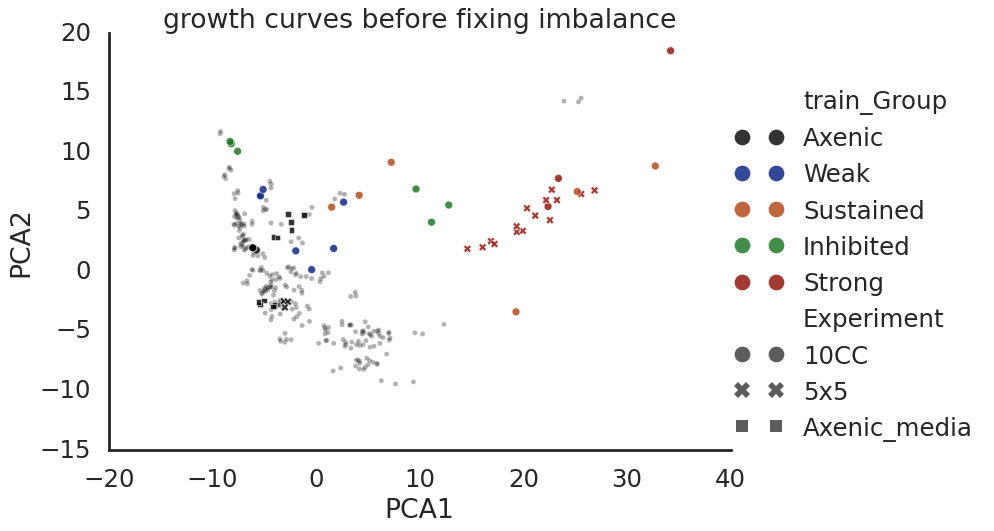

In [65]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    alpha=0.3, 
    zorder=-3,
    
    hue='Experiment', hue_order=eorder, palette=epalette,
    s=20, legend=False,
)
plt.title('growth curves before fixing imbalance')

In [66]:
pcadf.train_Group.value_counts()


train_Group
Other        252
Axenic        18
Strong        18
Inhibited      6
Sustained      6
Weak           6
Name: count, dtype: int64

# imbalance

In [67]:
from sklearn.model_selection import train_test_split
X_train_before_smt, X_test_before_smt, y_train_before_smt, y_test_before_smt = train_test_split(
    X_logged, y, test_size=0.5, stratify=y, random_state=43
)

X_train_before_smt = X_logged
y_train_before_smt = y
X_test_before_smt = X_logged
y_test_before_smt = y
X_train_before_smt.shape, y_train_before_smt.shape, X_test_before_smt.shape, y_test_before_smt.shape

((306, 126), (306,), (306, 126), (306,))

In [68]:
np.unique(y_train_before_smt, return_counts=True), np.unique(y_test_before_smt, return_counts=True)

((array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
        dtype=object),
  array([ 18,   6, 252,  18,   6,   6])),
 (array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
        dtype=object),
  array([ 18,   6, 252,  18,   6,   6])))

In [69]:
tdf  = X_test_before_smt.reset_index()
tdf.loc[~tdf.train_Group.isin(['Other'])].sort_values('train_Group')

train_Group       Sample           id                       full name  \
day                                                                         
0        Axenic          1A0            1                          Axenic   
17       Axenic  Ax_Media_D6    MED4_lowN                Axenic_MED4_lowN   
15       Axenic  Ax_Media_D4    MED4_lowN                Axenic_MED4_lowN   
14       Axenic  Ax_Media_C6    MED4_lowN                Axenic_MED4_lowN   
13       Axenic  Ax_Media_C5    MED4_lowN                Axenic_MED4_lowN   
12       Axenic  Ax_Media_C4    MED4_lowN                Axenic_MED4_lowN   
11       Axenic  Ax_Media_B6    MED4_lowN                Axenic_MED4_lowN   
10       Axenic  Ax_Media_B5    MED4_lowN                Axenic_MED4_lowN   
9        Axenic  Ax_Media_B4    MED4_lowN                Axenic_MED4_lowN   
16       Axenic  Ax_Media_D5    MED4_lowN                Axenic_MED4_lowN   
7        Axenic  Ax_Media_A5    MED4_lowN                Axenic_MED4_lowN   
6        Axenic  Ax_Media_A4    MED4_lowN                Axenic_MED4_lowN   
5        Axenic     5x5_30C0  MED4_Ax_Pro                          Axenic   
4        Axenic     5x5_30B0  MED4_Ax_Pro                          Axenic   
3        Axenic     5x5_30A0  MED4_Ax_Pro                          Axenic   
2        Axenic          1C0            1                          Axenic   
1        Axenic          1B0            1                          Axenic   
8        Axenic  Ax_Media_A6    MED4_lowN                Axenic_MED4_lowN   
23    Inhibited          4C0            4       Phaeobacter gallaeciensis   
22    Inhibited          4B0            4       Phaeobacter gallaeciensis   
21    Inhibited          4A0            4       Phaeobacter gallaeciensis   
19    Inhibited          3B0            3     Marinobacter adhaerens HP15   
18    Inhibited          3A0            3     Marinobacter adhaerens HP15   
20    Inhibited          3C0            3     Marinobacter adhaerens HP15   
286      Strong      5x5_1B0     MED4_1A3             A. macleodii HOT1A3   
293      Strong      5x5_6C0      MED4_DE           A. mediterranea AltDE   
292      Strong      5x5_6B0      MED4_DE           A. mediterranea AltDE   
291      Strong      5x5_6A0      MED4_DE           A. mediterranea AltDE   
290      Strong     5x5_21C0    MED4_ATCC          A. macleodii ATCC27126   
289      Strong     5x5_21B0    MED4_ATCC          A. macleodii ATCC27126   
288      Strong     5x5_21A0    MED4_ATCC          A. macleodii ATCC27126   
287      Strong      5x5_1C0     MED4_1A3             A. macleodii HOT1A3   
285      Strong      5x5_1A0     MED4_1A3             A. macleodii HOT1A3   
278      Strong          5C0            5  Pseudoalteromonas haloplanktis   
283      Strong     5x5_16B0    MED4_BS11               A. macleodii BS11   
282      Strong     5x5_16A0    MED4_BS11               A. macleodii BS11   
281      Strong     5x5_11C0     MED4_DE1          A. mediterranea AltDE1   
280      Strong     5x5_11B0     MED4_DE1          A. mediterranea AltDE1   
279      Strong     5x5_11A0     MED4_DE1          A. mediterranea AltDE1   
277      Strong          5B0            5  Pseudoalteromonas haloplanktis   
276      Strong          5A0            5  Pseudoalteromonas haloplanktis   
284      Strong     5x5_16C0    MED4_BS11               A. macleodii BS11   
299   Sustained          7C0            7  Sulfitobacter pseudonitzschiae   
298   Sustained          7B0            7  Sulfitobacter pseudonitzschiae   
297   Sustained          7A0            7  Sulfitobacter pseudonitzschiae   
295   Sustained          6B0            6               Ruegeria pomeroyi   
294   Sustained          6A0            6               Ruegeria pomeroyi   
296   Sustained          6C0            6               Ruegeria pomeroyi   
304        Weak         11B0           11                 Roseovarius 5C3   
300        Weak         10A0           10                   Marinovum 5F3   


In [70]:
 #sampling_strategy = {'Axenic' :100, 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],

In [71]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
#over_sampler =  RandomOverSampler()
smoteenn = SMOTEENN(
    smote=SMOTE(k_neighbors=5), 
    enn=EditedNearestNeighbours(sampling_strategy=['Other'], n_neighbors=50),
)
X_smt, y_smt = smoteenn.fit_resample(X_train_before_smt, y_train_before_smt)

In [72]:
y_train_before_smt.value_counts()

train_Group
Other        252
Axenic        18
Strong        18
Inhibited      6
Sustained      6
Weak           6
Name: count, dtype: int64

In [73]:
np.unique(y_smt, return_counts=True)

(array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
       dtype=object),
 array([252, 252,  77, 252, 252, 252]))

In [74]:
from sklearn.decomposition import PCA
pca = Pipeline([
    ('scale', StandardScaler()),    
    ('clf', PCA(n_components=2))
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [75]:
X_smt

ref_Bp[C]                                                              \
day  0.000000  1.081944  2.164583  2.747222  3.754167  4.701389  5.720139    
0     1.322650  0.044990  1.587533  1.943579  2.242214  2.791506  3.452052   
1     0.693016  0.645763  1.495363  1.947975  2.308589  2.826727  3.407201   
2     1.717126  0.677512  1.562054  1.921306  2.410273  2.975399  3.496843   
3     1.509062  1.853658  1.877643  2.243692  2.687276  2.978890  3.219515   
4     1.474456  1.811977  2.012700  2.146212  2.649838  2.982664  3.248471   
...        ...       ...       ...       ...       ...       ...       ...   
1332  1.090029  1.251756  2.113895  2.446118  2.711369  3.404731  3.427676   
1333  1.213190  0.695097  2.033442  2.501744  2.657059  2.517605  2.164000   
1334  1.177935  0.634076  2.087793  2.502387  2.622569  2.711636  2.442936   
1335  1.368704  1.567721  2.294514  2.771424  3.100248  3.595172  3.907149   
1336  1.297068  0.476286  2.084335  2.575676  2.663120  2.544056  2.242897   

                                    ... ref_Bp[N]                      \
day  6.731944  7.984028  8.943750   ... 73.768750 76.939583 79.795139   
0     3.830293  4.419266  4.308084  ...  0.000000       0.0       0.0   
1     3.900961  4.491095  4.358942  ...  0.000000       0.0       0.0   
2     3.962683  4.540542  4.205250  ...  0.000000       0.0       0.0   
3     3.423100  3.795765  4.009635  ...  0.000000       0.0       0.0   
4     3.470004  3.882955  4.113520  ...  0.000000       0.0       0.0   
...        ...       ...       ...  ...       ...       ...       ...   
1332  3.227119  1.492505  2.877920  ...  0.111418       0.0       0.0   
1333  1.867375  0.962927  2.140614  ...  0.000000       0.0       0.0   
1334  2.134479  1.122265  2.359789  ...  0.044316       0.0       0.0   
1335  4.183178  3.421769  3.513678  ...  0.000000       0.0       0.0   
1336  2.000739  1.401556  2.277947  ...  0.000000       0.0       0.0   

                                                                            
day  80.888889 81.958333 84.218750 86.892361 87.794444 88.748611 91.000000  
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
...        ...       ...       ...       ...       ...       ...       ...  
1332       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1333       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1334       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1335       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1336       0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[1337 rows x 126 columns]

In [76]:
Xpca = pca.fit_transform(X_logged)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'], index=X_logged.index)
pcadf.reset_index(inplace=True)


In [77]:
pcadf.loc[pcadf.train_Group.isin(['Axenic'])].nlargest(n=10,columns='PCA1')


,train_Group,Sample,id,full name,Group,Experiment,PCA1,PCA2
8,Axenic,Ax_Media_A6,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-1.161118,4.713291
12,Axenic,Ax_Media_C4,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-2.361251,3.418345
7,Axenic,Ax_Media_A5,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-2.445753,4.106534
6,Axenic,Ax_Media_A4,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-2.692665,4.796672
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,-2.727635,-2.590449
5,Axenic,5x5_30C0,MED4_Ax_Pro,Axenic,Axenic,5x5,-3.013660,-3.059268
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,-3.117415,-2.533702
14,Axenic,Ax_Media_C6,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-3.720173,2.797408
10,Axenic,Ax_Media_B5,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-4.020574,-2.853490
9,Axenic,Ax_Media_B4,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-4.078855,-2.955882


In [78]:
pcadf.loc[pcadf.train_Group.isin(['Inhibited'])].nlargest(n=10,columns='PCA1')


,train_Group,Sample,id,full name,Group,Experiment,PCA1,PCA2
20,Inhibited,3C0,3,Marinobacter adhaerens HP15,Inhibited,10CC,12.796733,5.529645
19,Inhibited,3B0,3,Marinobacter adhaerens HP15,Inhibited,10CC,11.131698,4.090062
18,Inhibited,3A0,3,Marinobacter adhaerens HP15,Inhibited,10CC,9.637520,6.875064
22,Inhibited,4B0,4,Phaeobacter gallaeciensis,Inhibited,10CC,-7.573592,10.038151
21,Inhibited,4A0,4,Phaeobacter gallaeciensis,Inhibited,10CC,-8.189903,10.670933
23,Inhibited,4C0,4,Phaeobacter gallaeciensis,Inhibited,10CC,-8.306169,10.860429


Text(0.5, 1.0, 'growth curves before fixing imbalance')

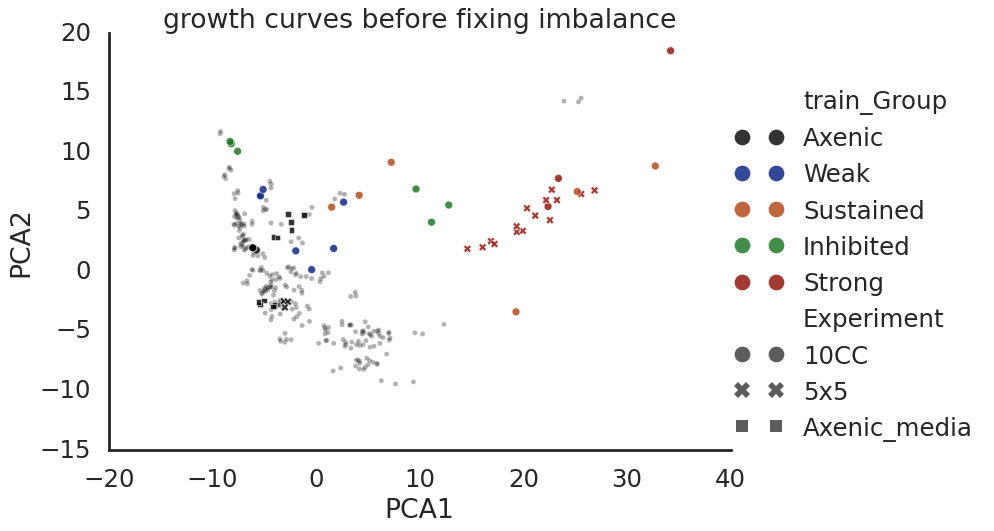

In [79]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    alpha=0.3, 
    zorder=-3,
    
    hue='Experiment', hue_order=eorder, palette=epalette,
    s=20, legend=False,
)
plt.title('growth curves before fixing imbalance')

In [80]:
Xpca = pca.fit_transform(X_smt)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'])
pcadf['train_Group'] = y_smt


Text(0.5, 1.0, 'growth curves after fixing imbalance')

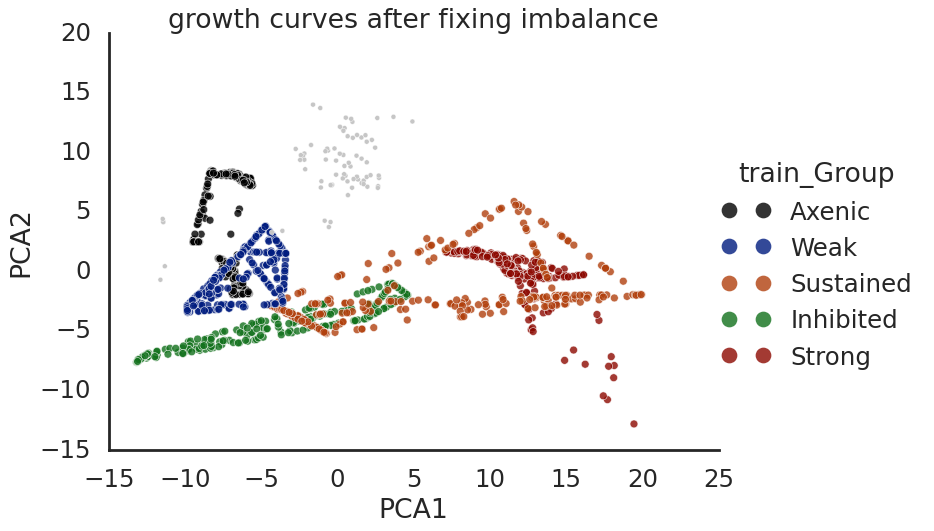

In [81]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  
    alpha=1, 
    #zorder=-3,
    
    hue='train_Group', hue_order=tgorder[:-5], palette=tgpalette[:-5],
    s=20, legend=False,
)
plt.title('growth curves after fixing imbalance')

# Compute features

In [82]:
def _X_smt2df(X_smt):
    # do exponent to recover 'original' values
    x= np.exp(X_smt)
    x = x.T.melt(ignore_index=False, var_name='smt_id',).reset_index()
    x = x.pivot(index=['smt_id', 'day'], values='value', columns='level_0').reset_index()
    return x

df_smt = _X_smt2df(X_smt)

In [83]:
df_smt

level_0,smt_id,day,ref_Bp[C],ref_Bp[N]
0,0,0.000000,3.753355,1.000000
1,0,1.081944,1.046017,1.000000
2,0,2.164583,4.891667,1.000000
3,0,2.747222,6.983701,1.054144
4,0,3.754167,9.414152,1.421004
...,...,...,...,...
84226,1336,84.218750,2.798402,1.000000
84227,1336,86.892361,1.150200,1.000000
84228,1336,87.794444,1.481643,1.000000
84229,1336,88.748611,1.362635,1.000000


In [84]:
X_smt_features = ml.compute_features(df_smt,groupby_cols=['smt_id'])

In [85]:
X_smt_features

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,std_30-60days_Nbiomass,median_30-60days_Nbiomass,mean_30-60days_Nbiomass,std_30-60days_Cbiomass,median_30-60days_Cbiomass,mean_30-60days_Cbiomass,std_60-80days_Nbiomass,median_60-80days_Nbiomass,mean_60-80days_Nbiomass,std_60-80days_Cbiomass,median_60-80days_Cbiomass,mean_60-80days_Cbiomass,last_dayN,last_dayC,D90_dayN,D90_dayC
smt_id,,,,,,,,,,,,,,,,,,,,
0,7.984028,12.533628,7.984028,83.035285,0.000000,1.000000,1.000000,0.281642,1.000000,1.167868,0.000000,1.0,1.000000,0.066614,1.000000,1.022205,20.778472,58.837500,15.914583,15.914583
1,7.984028,13.467033,7.984028,89.219090,0.000000,1.000000,1.000000,0.326451,1.000000,1.163016,0.000000,1.0,1.000000,0.015339,1.000000,1.005113,17.727083,48.810417,12.794444,12.794444
2,7.984028,14.149672,7.984028,93.741575,0.000000,1.000000,1.000000,0.049114,1.000000,1.018946,0.000000,1.0,1.000000,0.280863,1.015252,1.230666,17.727083,26.747222,12.794444,12.794444
3,13.695833,34.881481,13.695833,231.089814,0.000000,1.000000,1.000000,0.324709,1.005994,1.202299,0.000000,1.0,1.000000,0.367806,1.000000,1.183657,23.898611,27.852778,10.202778,10.202778
4,13.695833,32.866977,13.695833,217.743724,0.000000,1.000000,1.000000,0.419062,1.304993,1.358565,0.000000,1.0,1.000000,0.361620,1.000000,1.231086,23.898611,84.218750,12.038889,12.038889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,5.720139,4.649806,5.720139,30.804964,0.420740,1.281682,1.365261,3.782409,7.884833,7.472864,0.205642,1.0,1.116344,2.367817,4.884749,5.761995,51.784028,91.000000,0.000000,25.356250
1333,3.754167,2.151592,3.754167,14.254299,0.000000,1.000000,1.000000,0.982316,1.405230,1.916800,0.000000,1.0,1.000000,0.593821,1.788967,1.701422,3.754167,91.000000,0.000000,27.322222
1334,4.701389,2.272285,4.701389,15.053889,0.126664,1.103586,1.120692,1.273060,2.611236,2.921748,0.069238,1.0,1.040126,0.990327,2.930418,2.734875,4.701389,91.000000,0.000000,32.201389


In [86]:
X_train, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(df_smt, groupby_cols=['smt_id'])

In [87]:
X_test, _, _, _ = ml.df2finalX(refdf_interpolate, groupby_cols=groupby_cols)

In [88]:
y_test = X_test.index.get_level_values(0)
y_test

Index(['Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic',
       'Axenic', 'Axenic', 'Axenic',
       ...
       'Sustained', 'Sustained', 'Sustained', 'Sustained', 'Weak', 'Weak',
       'Weak', 'Weak', 'Weak', 'Weak'],
      dtype='object', name='train_Group', length=306)

In [89]:
forest_features

Index(['max_Nday', 'max_Nbiomass', 'max_Cday', 'max_Cbiomass',
       'std_30-60days_Nbiomass', 'median_30-60days_Nbiomass',
       'mean_30-60days_Nbiomass', 'std_30-60days_Cbiomass',
       'median_30-60days_Cbiomass', 'mean_30-60days_Cbiomass',
       'std_60-80days_Nbiomass', 'median_60-80days_Nbiomass',
       'mean_60-80days_Nbiomass', 'std_60-80days_Cbiomass',
       'median_60-80days_Cbiomass', 'mean_60-80days_Cbiomass', 'last_dayN',
       'last_dayC', 'D90_dayN', 'D90_dayC'],
      dtype='object')

In [90]:
y_smt

array(['Axenic', 'Axenic', 'Axenic', ..., 'Weak', 'Weak', 'Weak'],
      dtype=object)

In [91]:
pd.Series(y_smt).value_counts()

Axenic       252
Inhibited    252
Strong       252
Sustained    252
Weak         252
Other         77
Name: count, dtype: int64

In [92]:
y_train = y_smt

In [93]:
logistic_Cfeatures, logistic_Nfeatures, forest_features

(['ref_Bp[C]_0.0',
  'ref_Bp[C]_1.1',
  'ref_Bp[C]_2.2',
  'ref_Bp[C]_2.7',
  'ref_Bp[C]_3.8',
  'ref_Bp[C]_4.7',
  'ref_Bp[C]_5.7',
  'ref_Bp[C]_6.7',
  'ref_Bp[C]_8.0',
  'ref_Bp[C]_8.9',
  'ref_Bp[C]_9.7',
  'ref_Bp[C]_10.8',
  'ref_Bp[C]_11.7',
  'ref_Bp[C]_12.8',
  'ref_Bp[C]_13.7',
  'ref_Bp[C]_16.1',
  'ref_Bp[C]_16.7',
  'ref_Bp[C]_17.7',
  'ref_Bp[C]_18.7',
  'ref_Bp[C]_19.7',
  'ref_Bp[C]_20.8',
  'ref_Bp[C]_21.9',
  'ref_Bp[C]_23.9',
  'ref_Bp[C]_25.7',
  'ref_Bp[C]_26.7',
  'ref_Bp[C]_27.9',
  'ref_Bp[C]_29.8',
  'ref_Bp[C]_31.1',
  'ref_Bp[C]_31.8',
  'ref_Bp[C]_32.8',
  'ref_Bp[C]_33.7',
  'ref_Bp[C]_34.8',
  'ref_Bp[C]_36.9',
  'ref_Bp[C]_37.8',
  'ref_Bp[C]_39.9',
  'ref_Bp[C]_40.8',
  'ref_Bp[C]_41.8',
  'ref_Bp[C]_44.8',
  'ref_Bp[C]_46.8',
  'ref_Bp[C]_47.9',
  'ref_Bp[C]_48.8',
  'ref_Bp[C]_49.9',
  'ref_Bp[C]_51.8',
  'ref_Bp[C]_53.0',
  'ref_Bp[C]_54.8',
  'ref_Bp[C]_58.8',
  'ref_Bp[C]_59.9',
  'ref_Bp[C]_62.9',
  'ref_Bp[C]_65.7',
  'ref_Bp[C]_67.0',
  'ref_Bp[C

# Stacking classifier

The goal is to create multiple classifiers:
1. randomforest based on generated features: last day, max day, max value, mean late biomass (N & C), std late biomass (N & C)
2. logical regression based on N biomass
3. logical regression based on C biomass
4. tslearn based on N biomass 
5. tslearn based on C biomass 

and than combine the results using a stacking classifier

# stack

In [94]:
stack = ml.build_classifier(forest_features, logistic_Nfeatures, logistic_Cfeatures, y_train)

stack

StackingClassifier(estimators=[('logisticN',
                                Pipeline(memory='/tmp/Osnat/sklearn_cache',
                                         steps=[('select',
                                                 ColumnTransformer(transformers=[('sel',
                                                                                  'passthrough',
                                                                                  ['ref_Bp[N]_0.0',
                                                                                   'ref_Bp[N]_1.1',
                                                                                   'ref_Bp[N]_2.2',
                                                                                   'ref_Bp[N]_2.7',
                                                                                   'ref_Bp[N]_3.8',
                                                                                   'ref_Bp[N]_4.7',
                                                                                   'ref_Bp[N]_5.7',
                                                                                   'ref_Bp[N]_6.7',
                                                                                   'ref_Bp[N]_8.0',
                                                                                   'ref_Bp[N]_8.9',
                                                                                   'ref_Bp[N]_9.7',
                                                                                   'ref_Bp[N]_10.8'...
       'mean_60-80days_Nbiomass', 'std_60-80days_Cbiomass',
       'median_60-80days_Cbiomass', 'mean_60-80days_Cbiomass', 'last_dayN',
       'last_dayC', 'D90_dayN', 'D90_dayC'],
      dtype='object'))])),
                                                ('scale', StandardScaler()),
                                                ('clf',
                                                 RandomForestClassifier(ccp_alpha=0.05,
                                                                        class_weight={0: 100,
                                                                                      1: 10000,
                                                                                      2: 1,
                                                                                      3: 10000,
                                                                                      4: 10000,
                                                                                      5: 100}))]))],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   verbose=True)

In [95]:
stack.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:370: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:370: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance pr

StackingClassifier(estimators=[('logisticN',
                                Pipeline(memory='/tmp/Osnat/sklearn_cache',
                                         steps=[('select',
                                                 ColumnTransformer(transformers=[('sel',
                                                                                  'passthrough',
                                                                                  ['ref_Bp[N]_0.0',
                                                                                   'ref_Bp[N]_1.1',
                                                                                   'ref_Bp[N]_2.2',
                                                                                   'ref_Bp[N]_2.7',
                                                                                   'ref_Bp[N]_3.8',
                                                                                   'ref_Bp[N]_4.7',
                                                                                   'ref_Bp[N]_5.7',
                                                                                   'ref_Bp[N]_6.7',
                                                                                   'ref_Bp[N]_8.0',
                                                                                   'ref_Bp[N]_8.9',
                                                                                   'ref_Bp[N]_9.7',
                                                                                   'ref_Bp[N]_10.8'...
       'mean_60-80days_Nbiomass', 'std_60-80days_Cbiomass',
       'median_60-80days_Cbiomass', 'mean_60-80days_Cbiomass', 'last_dayN',
       'last_dayC', 'D90_dayN', 'D90_dayC'],
      dtype='object'))])),
                                                ('scale', StandardScaler()),
                                                ('clf',
                                                 RandomForestClassifier(ccp_alpha=0.05,
                                                                        class_weight={0: 100,
                                                                                      1: 10000,
                                                                                      2: 1,
                                                                                      3: 10000,
                                                                                      4: 10000,
                                                                                      5: 100}))]))],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   verbose=True)

<Axes: xlabel='Importance', ylabel='Feature'>

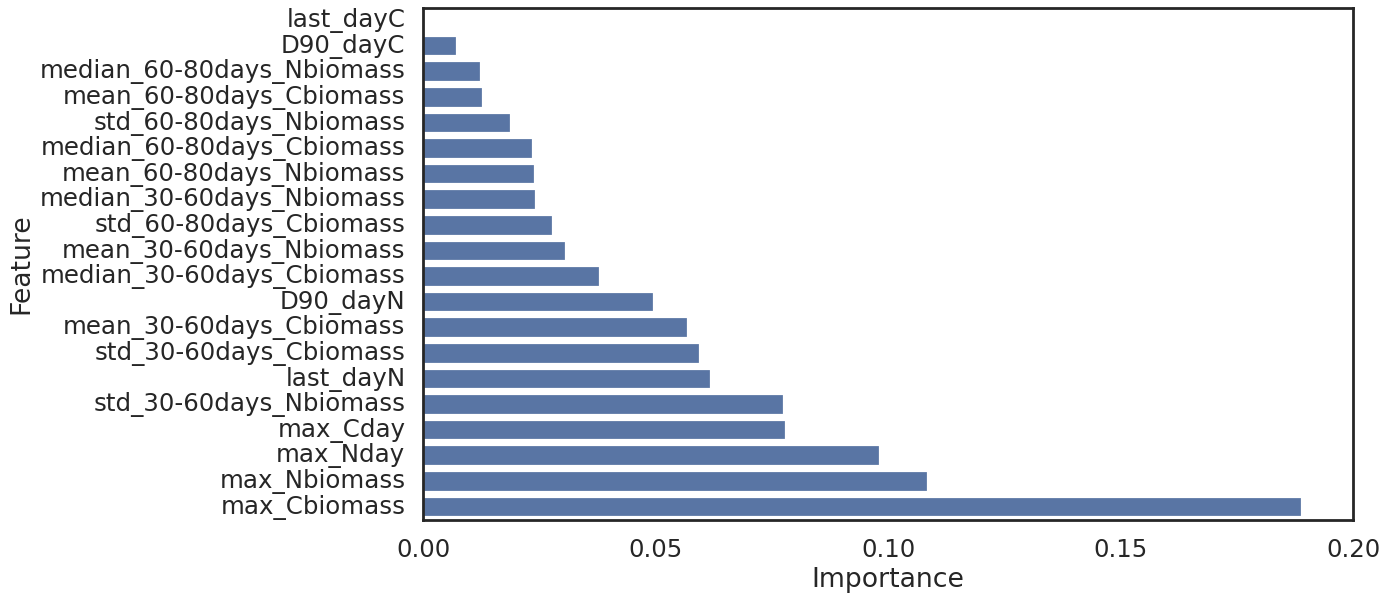

In [96]:


forest_importance_df = pd.DataFrame(dict(
    Feature=forest_features, 
    Importance=stack.estimators_[2].named_steps['clf'].feature_importances_
    ))
forest_importance_df =forest_importance_df.sort_values('Importance')
                                    
sns.barplot(data=forest_importance_df, y='Feature', x='Importance')


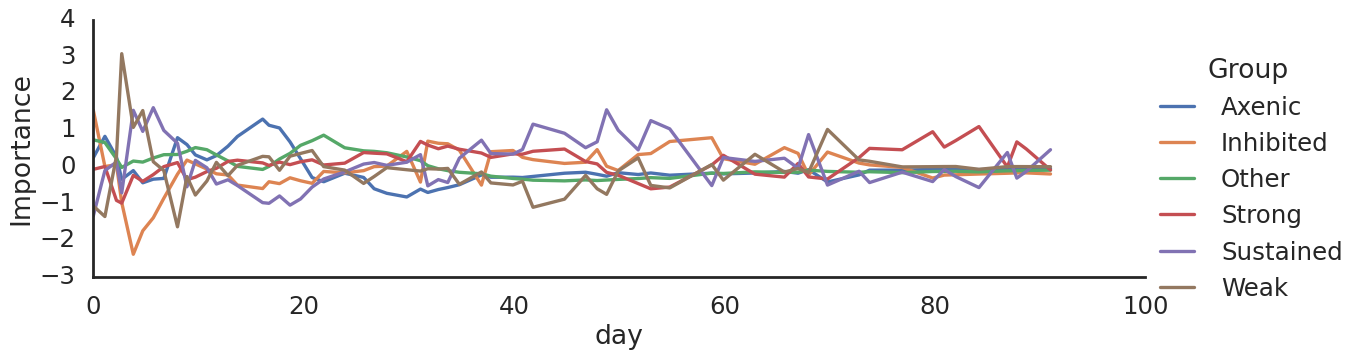

In [97]:
logN_coefdf = pd.DataFrame(
    stack.estimators_[0].named_steps['clf'].coef_.T, index=logistic_Nfeatures,
    columns=stack.classes_,
).reset_index().melt(id_vars='index', value_name='Importance', var_name='Group').rename(columns={'index': 'Feature'})
logN_coefdf[['_', 'day']] = logN_coefdf.Feature.str.rsplit('_', expand=True, n=1)
logN_coefdf['day'] = pd.to_numeric(logN_coefdf['day'])
logN_coefdf
sns.relplot(data=logN_coefdf, x='day', y='Importance', aspect=3,
            hue='Group', kind='line'
           )

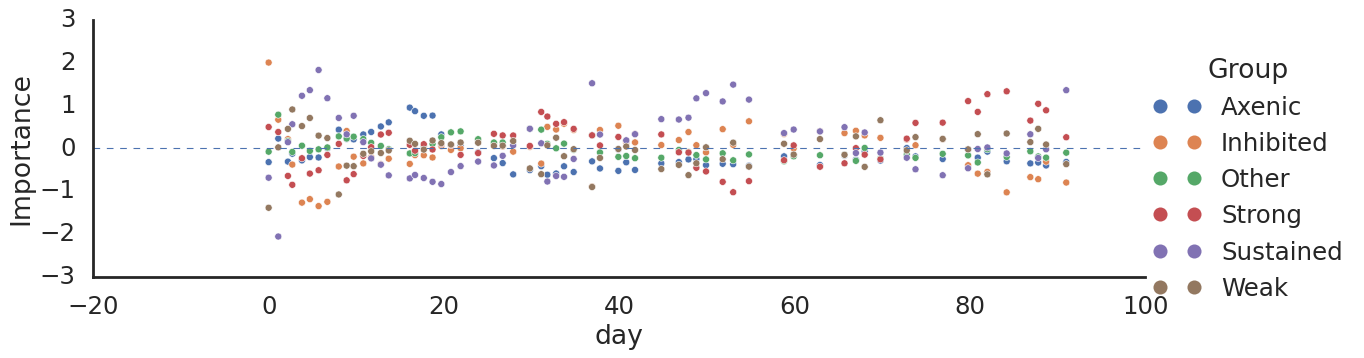

In [98]:
logC_coefdf = pd.DataFrame(
    stack.estimators_[1].named_steps['clf'].coef_.T, index=logistic_Cfeatures,
    columns=stack.classes_,
).reset_index().melt(id_vars='index', value_name='Importance', var_name='Group').rename(columns={'index': 'Feature'})
logC_coefdf[['_', 'day']] = logC_coefdf.Feature.str.rsplit('_', expand=True, n=1)
logC_coefdf['day'] = pd.to_numeric(logC_coefdf['day'])
logC_coefdf
sns.relplot(data=logC_coefdf, x='day', y='Importance', aspect=3,
            hue='Group', #kind='line'
            
            s=40,
           )
plt.axhline(0, ls='--', lw=1)

In [99]:
y_pred_prop = stack.predict_proba(X_test)
y_pred = stack.predict(X_test)

In [100]:
y_pred_prop

array([[9.73789314e-01, 1.63530020e-03, 2.13827774e-02, 9.65540580e-04,
        9.71119042e-04, 1.25594910e-03],
       [9.76443897e-01, 1.58518007e-03, 1.90065876e-02, 8.51990308e-04,
        9.02255248e-04, 1.21008961e-03],
       [9.75997455e-01, 1.59456191e-03, 1.93633630e-02, 8.72105751e-04,
        9.47453685e-04, 1.22506113e-03],
       ...,
       [1.03319451e-03, 2.02795738e-03, 1.16178918e-02, 2.15998043e-03,
        2.58565505e-03, 9.80575321e-01],
       [1.10670324e-03, 1.94657560e-03, 9.73609354e-03, 1.80636900e-03,
        3.01146064e-03, 9.82392798e-01],
       [1.14226527e-03, 1.98584847e-03, 9.50405633e-03, 1.75850421e-03,
        3.03495367e-03, 9.82574372e-01]])

In [101]:
from sklearn.metrics import balanced_accuracy_score
#print(pipe_forest.score(X_train, y_train), pipe_forest.score(X_test, y_test))
print(balanced_accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8915343915343916
              precision    recall  f1-score   support

      Axenic       0.13      1.00      0.23        18
   Inhibited       0.23      1.00      0.38         6
       Other       1.00      0.35      0.52       252
      Strong       0.86      1.00      0.92        18
   Sustained       0.67      1.00      0.80         6
        Weak       0.29      1.00      0.44         6

    accuracy                           0.46       306
   macro avg       0.53      0.89      0.55       306
weighted avg       0.90      0.46      0.53       306



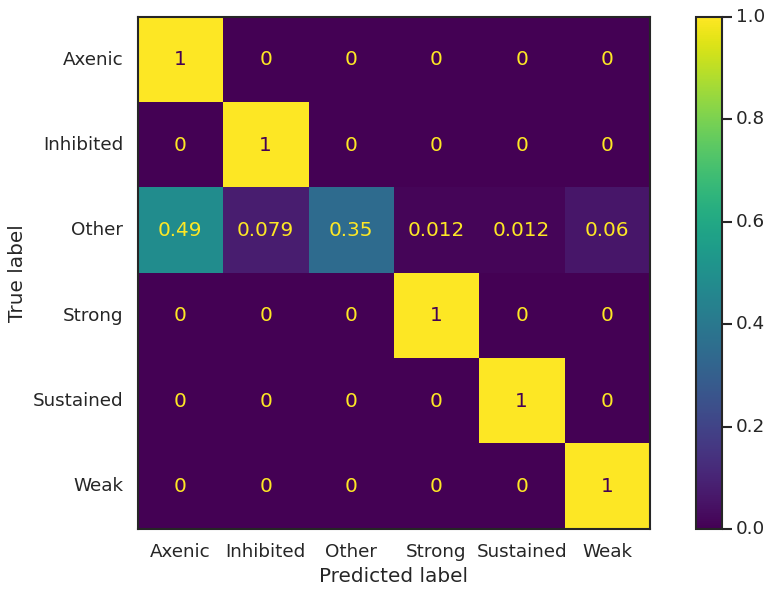

In [102]:
sns.set_context('talk')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=y_pred, normalize='true')
#plt.xlim((0,30))

In [103]:
X_test

max_Nday  \
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         7.984028   
            1B0      1           Axenic          Axenic 10CC         7.984028   
            1C0      1           Axenic          Axenic 10CC         7.984028   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         3.754167   
            10C0     10          Marinovum 5F3   Weak   10CC         6.731944   
            11A0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11B0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11C0     11          Roseovarius 5C3 Weak   10CC         4.701389   

                                                                    max_Nbiomass  \
train_Group Sample   id          full name       Group  Experiment                 
Axenic      1A0      1           Axenic          Axenic 10CC           12.533628   
            1B0      1           Axenic          Axenic 10CC           13.467033   
            1C0      1           Axenic          Axenic 10CC           14.149672   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5            34.881481   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5            32.866977   
...                                                                          ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC            2.085284   
            10C0     10          Marinovum 5F3   Weak   10CC           10.857147   
            11A0     11          Roseovarius 5C3 Weak   10CC           13.857494   
            11B0     11          Roseovarius 5C3 Weak   10CC            9.964279   
            11C0     11          Roseovarius 5C3 Weak   10CC            4.219456   

                                                                     max_Cday  \
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         7.984028   
            1B0      1           Axenic          Axenic 10CC         7.984028   
            1C0      1           Axenic          Axenic 10CC         7.984028   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         3.754167   
            10C0     10          Marinovum 5F3   Weak   10CC         6.731944   
            11A0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11B0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11C0     11          Roseovarius 5C3 Weak   10CC         4.701389   

                                                                    max_Cbiomass  \
train_Group Sample   id          full name       Group  Experiment                 
Axenic      1A0      1           Axenic          Axenic 10CC           83.035285   
            1B0      1           Axenic          Axenic 10CC           89.219090   
            1C0      1           Axenic          Axenic 10CC           93.741575   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5           231.089814   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5           217.743724   
...                                                                          ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC           13.815004   
            10C0     10          Marinovum 5F3   Weak   10CC           71.928598   
            11A0     11     

In [104]:
df_predicted = pd.DataFrame(y_pred_prop, columns=stack.classes_)
df_predicted['y'] = y_test
df_predicted['y_pred'] = y_pred

df_predicted.index = X_test.index
df_predicted = df_predicted.reset_index()
df_predicted


,train_Group,Sample,id,full name,Group,Experiment,Axenic,Inhibited,Other,Strong,Sustained,Weak,y,y_pred
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.973789,0.001635,0.021383,0.000966,0.000971,0.001256,Axenic,Axenic
1,Axenic,1B0,1,Axenic,Axenic,10CC,0.976444,0.001585,0.019007,0.000852,0.000902,0.001210,Axenic,Axenic
2,Axenic,1C0,1,Axenic,Axenic,10CC,0.975997,0.001595,0.019363,0.000872,0.000947,0.001225,Axenic,Axenic
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.922931,0.002153,0.067669,0.003310,0.002140,0.001796,Axenic,Axenic
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.922909,0.002154,0.067689,0.003311,0.002141,0.001797,Axenic,Axenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Weak,10B0,10,Marinovum 5F3,Weak,10CC,0.001522,0.002859,0.006142,0.001025,0.000626,0.987826,Weak,Weak
302,Weak,10C0,10,Marinovum 5F3,Weak,10CC,0.001084,0.002170,0.010600,0.001936,0.001908,0.982302,Weak,Weak
303,Weak,11A0,11,Roseovarius 5C3,Weak,10CC,0.001033,0.002028,0.011618,0.002160,0.002586,0.980575,Weak,Weak
304,Weak,11B0,11,Roseovarius 5C3,Weak,10CC,0.001107,0.001947,0.009736,0.001806,0.003011,0.982393,Weak,Weak


In [105]:
df_predicted.columns

Index(['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
       'Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak', 'y',
       'y_pred'],
      dtype='object')

In [106]:
mdf_predicted = df_predicted.melt(
    id_vars=['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
        'y', 'y_pred'], 
    var_name='predicted', value_name='prob')
#mdf_predicted.predicted = pd.to_numeric(mdf_predicted.predicted)
mdf_predicted['predicted_correctly'] = (mdf_predicted['y'] == mdf_predicted['predicted']).map({
    True: 'correct prediction', False: 'false prediction'
})



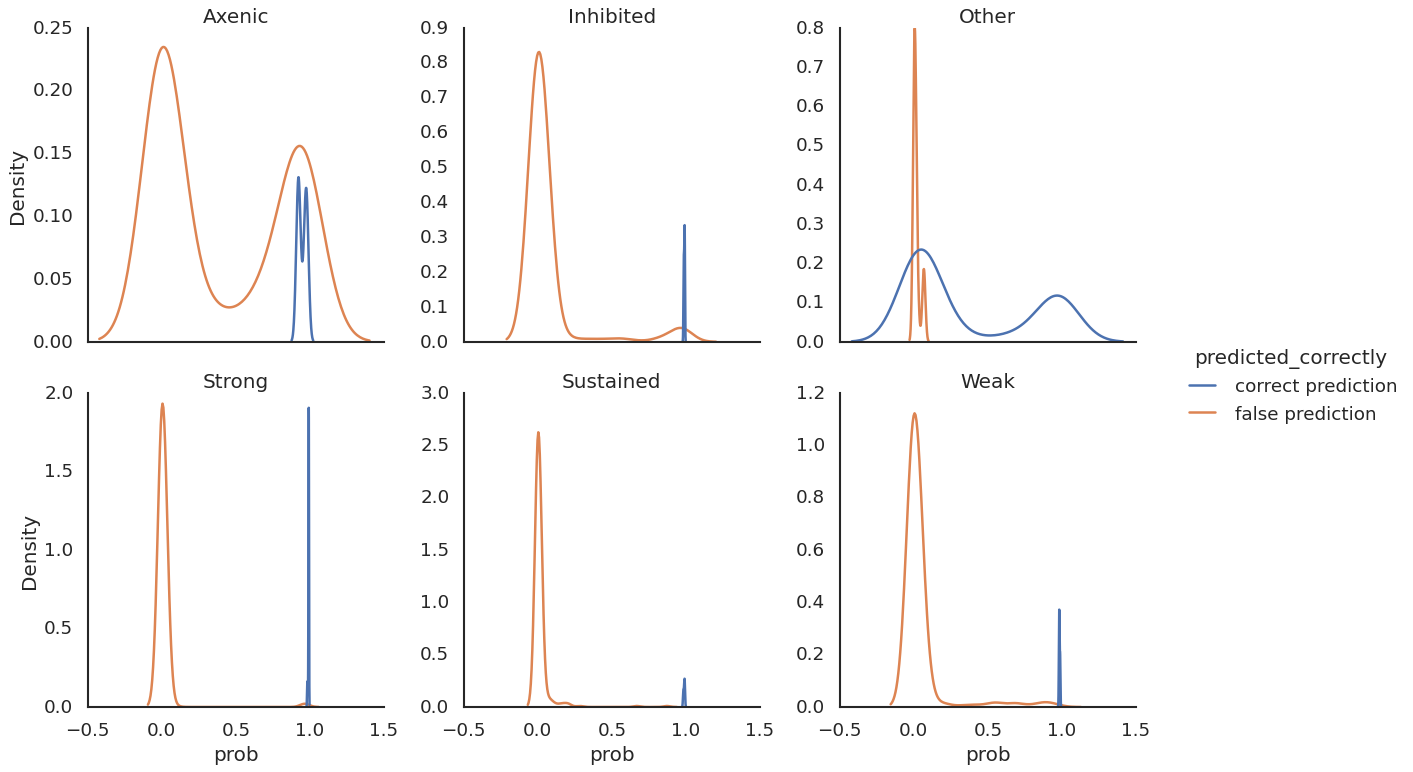

In [107]:
g=sns.displot(data=mdf_predicted, #.loc[mdf_predicted.predicted.isin([3])], 
            x='prob',
            kind='kde',
            col='predicted',
            hue='predicted_correctly',
            col_wrap=3,
              #stat='percent',
              #log_scale=True,
          #clip=(0,1),
              facet_kws=dict(sharey=False),
           )
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

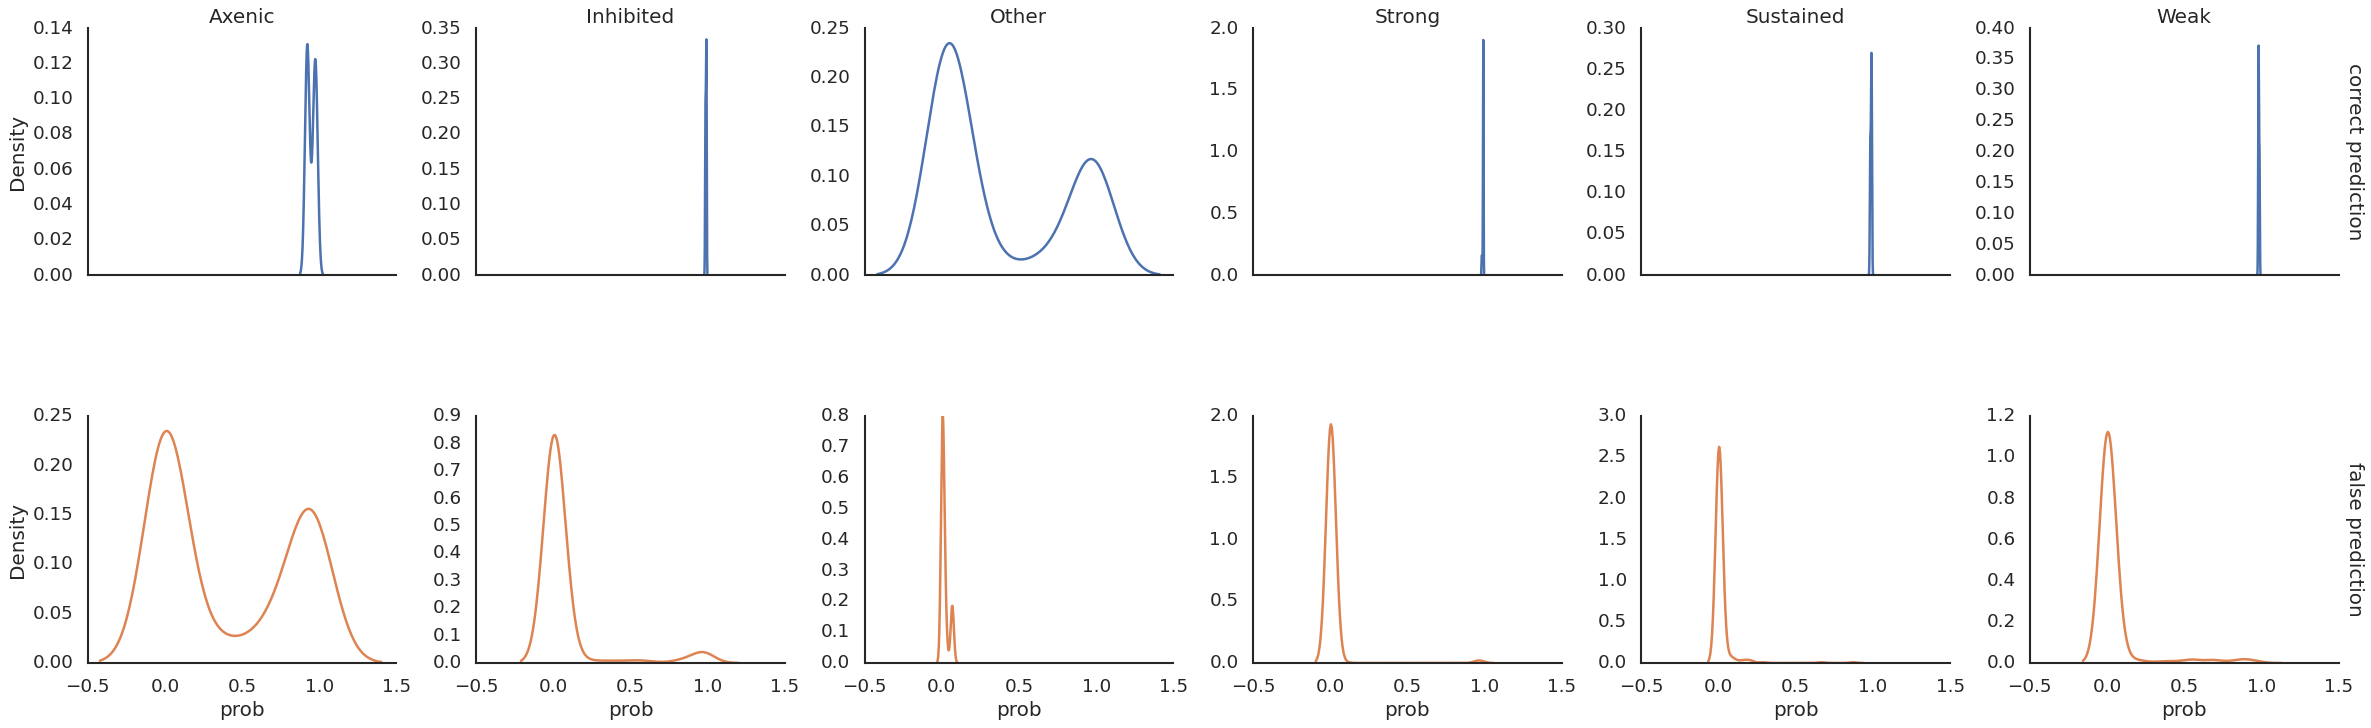

In [108]:
g=sns.displot(data=mdf_predicted, #.loc[mdf_predicted.predicted_correctly.isin([True])], 
            x='prob',
            kind='kde',
            col='predicted',
            row='predicted_correctly',
            hue='predicted_correctly',
            #col_wrap=3,
              #stat='percent',
              #log_scale=True,
          #clip=(0,1),
              legend=False,
              facet_kws=dict(sharey=False, margin_titles=True),
           )
g.set_titles(col_template='{col_name}', row_template='{row_name}', )
#g.set(yscale='log')

In [110]:
from joblib import dump, load
dump(stack, 'shading_10CC_ML_classifier_nolog.joblib') 

['shading_10CC_ML_classifier_nolog.joblib']

In [111]:
df_train_maxday  = X_train[forest_features].reset_index()
df_train_maxday['y_pred'] = y_train
df_train_maxday = df_train_maxday.melt(id_vars=['smt_id', 'y_pred'])


In [112]:
df_train_maxday

,smt_id,y_pred,variable,value
0,0,Axenic,max_Nday,7.984028
1,1,Axenic,max_Nday,7.984028
2,2,Axenic,max_Nday,7.984028
3,3,Axenic,max_Nday,13.695833
4,4,Axenic,max_Nday,13.695833
...,...,...,...,...
26735,1332,Weak,D90_dayC,25.356250
26736,1333,Weak,D90_dayC,27.322222
26737,1334,Weak,D90_dayC,32.201389
26738,1335,Weak,D90_dayC,19.002778


In [113]:
gorder = [ 'Strong', 'Sustained', 'Weak', 'Inhibited','Axenic', 'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
sns.color_palette(gpalette)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.0, 0.0, 0.0),
 (0.8274509803921568, 0.8274509803921568, 0.8274509803921568)]

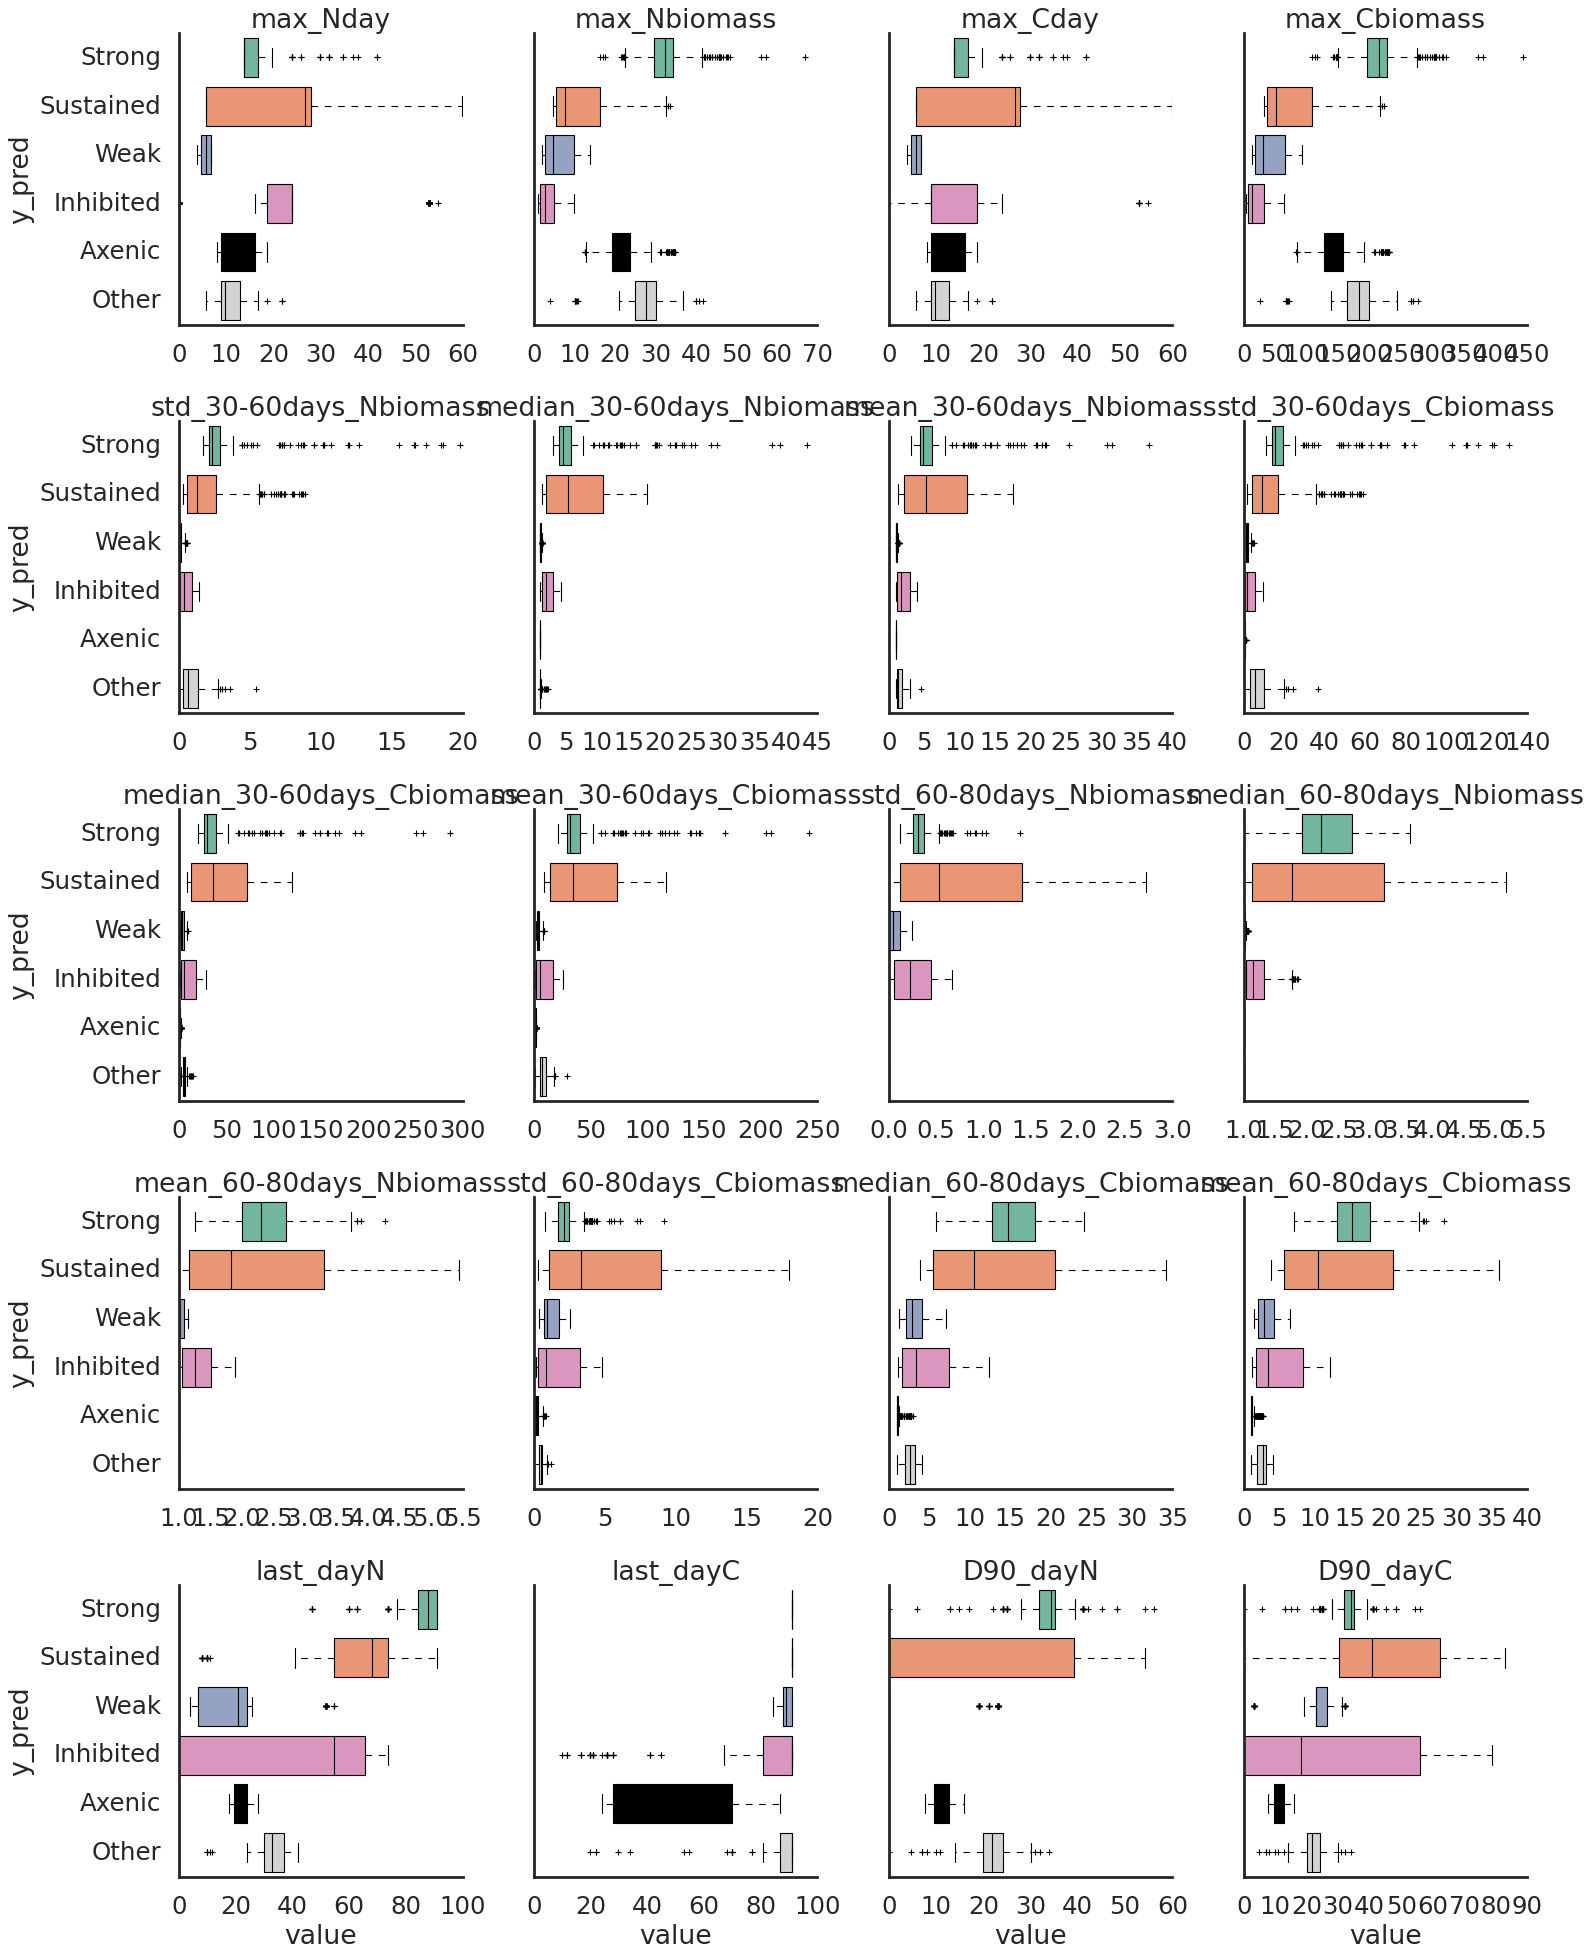

In [114]:
sns.set_context('poster')
sns.catplot(
    data=df_train_maxday,
    y='y_pred', x='value', order=gorder,
    col='variable', col_wrap=4,
    kind='box',
    hue='y_pred', hue_order=gorder, palette=gpalette,
    sharex=False, dodge=False,
).set_titles(col_template='{col_name}')


In [115]:
df_predicted

,train_Group,Sample,id,full name,Group,Experiment,Axenic,Inhibited,Other,Strong,Sustained,Weak,y,y_pred
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.973789,0.001635,0.021383,0.000966,0.000971,0.001256,Axenic,Axenic
1,Axenic,1B0,1,Axenic,Axenic,10CC,0.976444,0.001585,0.019007,0.000852,0.000902,0.001210,Axenic,Axenic
2,Axenic,1C0,1,Axenic,Axenic,10CC,0.975997,0.001595,0.019363,0.000872,0.000947,0.001225,Axenic,Axenic
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.922931,0.002153,0.067669,0.003310,0.002140,0.001796,Axenic,Axenic
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.922909,0.002154,0.067689,0.003311,0.002141,0.001797,Axenic,Axenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Weak,10B0,10,Marinovum 5F3,Weak,10CC,0.001522,0.002859,0.006142,0.001025,0.000626,0.987826,Weak,Weak
302,Weak,10C0,10,Marinovum 5F3,Weak,10CC,0.001084,0.002170,0.010600,0.001936,0.001908,0.982302,Weak,Weak
303,Weak,11A0,11,Roseovarius 5C3,Weak,10CC,0.001033,0.002028,0.011618,0.002160,0.002586,0.980575,Weak,Weak
304,Weak,11B0,11,Roseovarius 5C3,Weak,10CC,0.001107,0.001947,0.009736,0.001806,0.003011,0.982393,Weak,Weak


# Compute features for ref samples

In [116]:
ref_groupby_col = ['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',]
X_ref, forest_features1, logistic_Nfeatures1, logistic_Cfeatures1 = ml.df2finalX(
    refdf_final_df, groupby_cols=ref_groupby_col)

In [117]:
ref_groupby_col = ['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',]
X_intetpolate, forest_features1, logistic_Nfeatures1, logistic_Cfeatures1 = ml.df2finalX(
    refdf_interpolate, groupby_cols=ref_groupby_col)

In [118]:
fref_feature_df = X_ref[forest_features]
fint_feature_df = X_intetpolate[forest_features]


In [119]:
df_ref_maxday = fref_feature_df.reset_index().melt(id_vars=ref_groupby_col)
df_int_maxday = fint_feature_df.reset_index().melt(id_vars=ref_groupby_col)


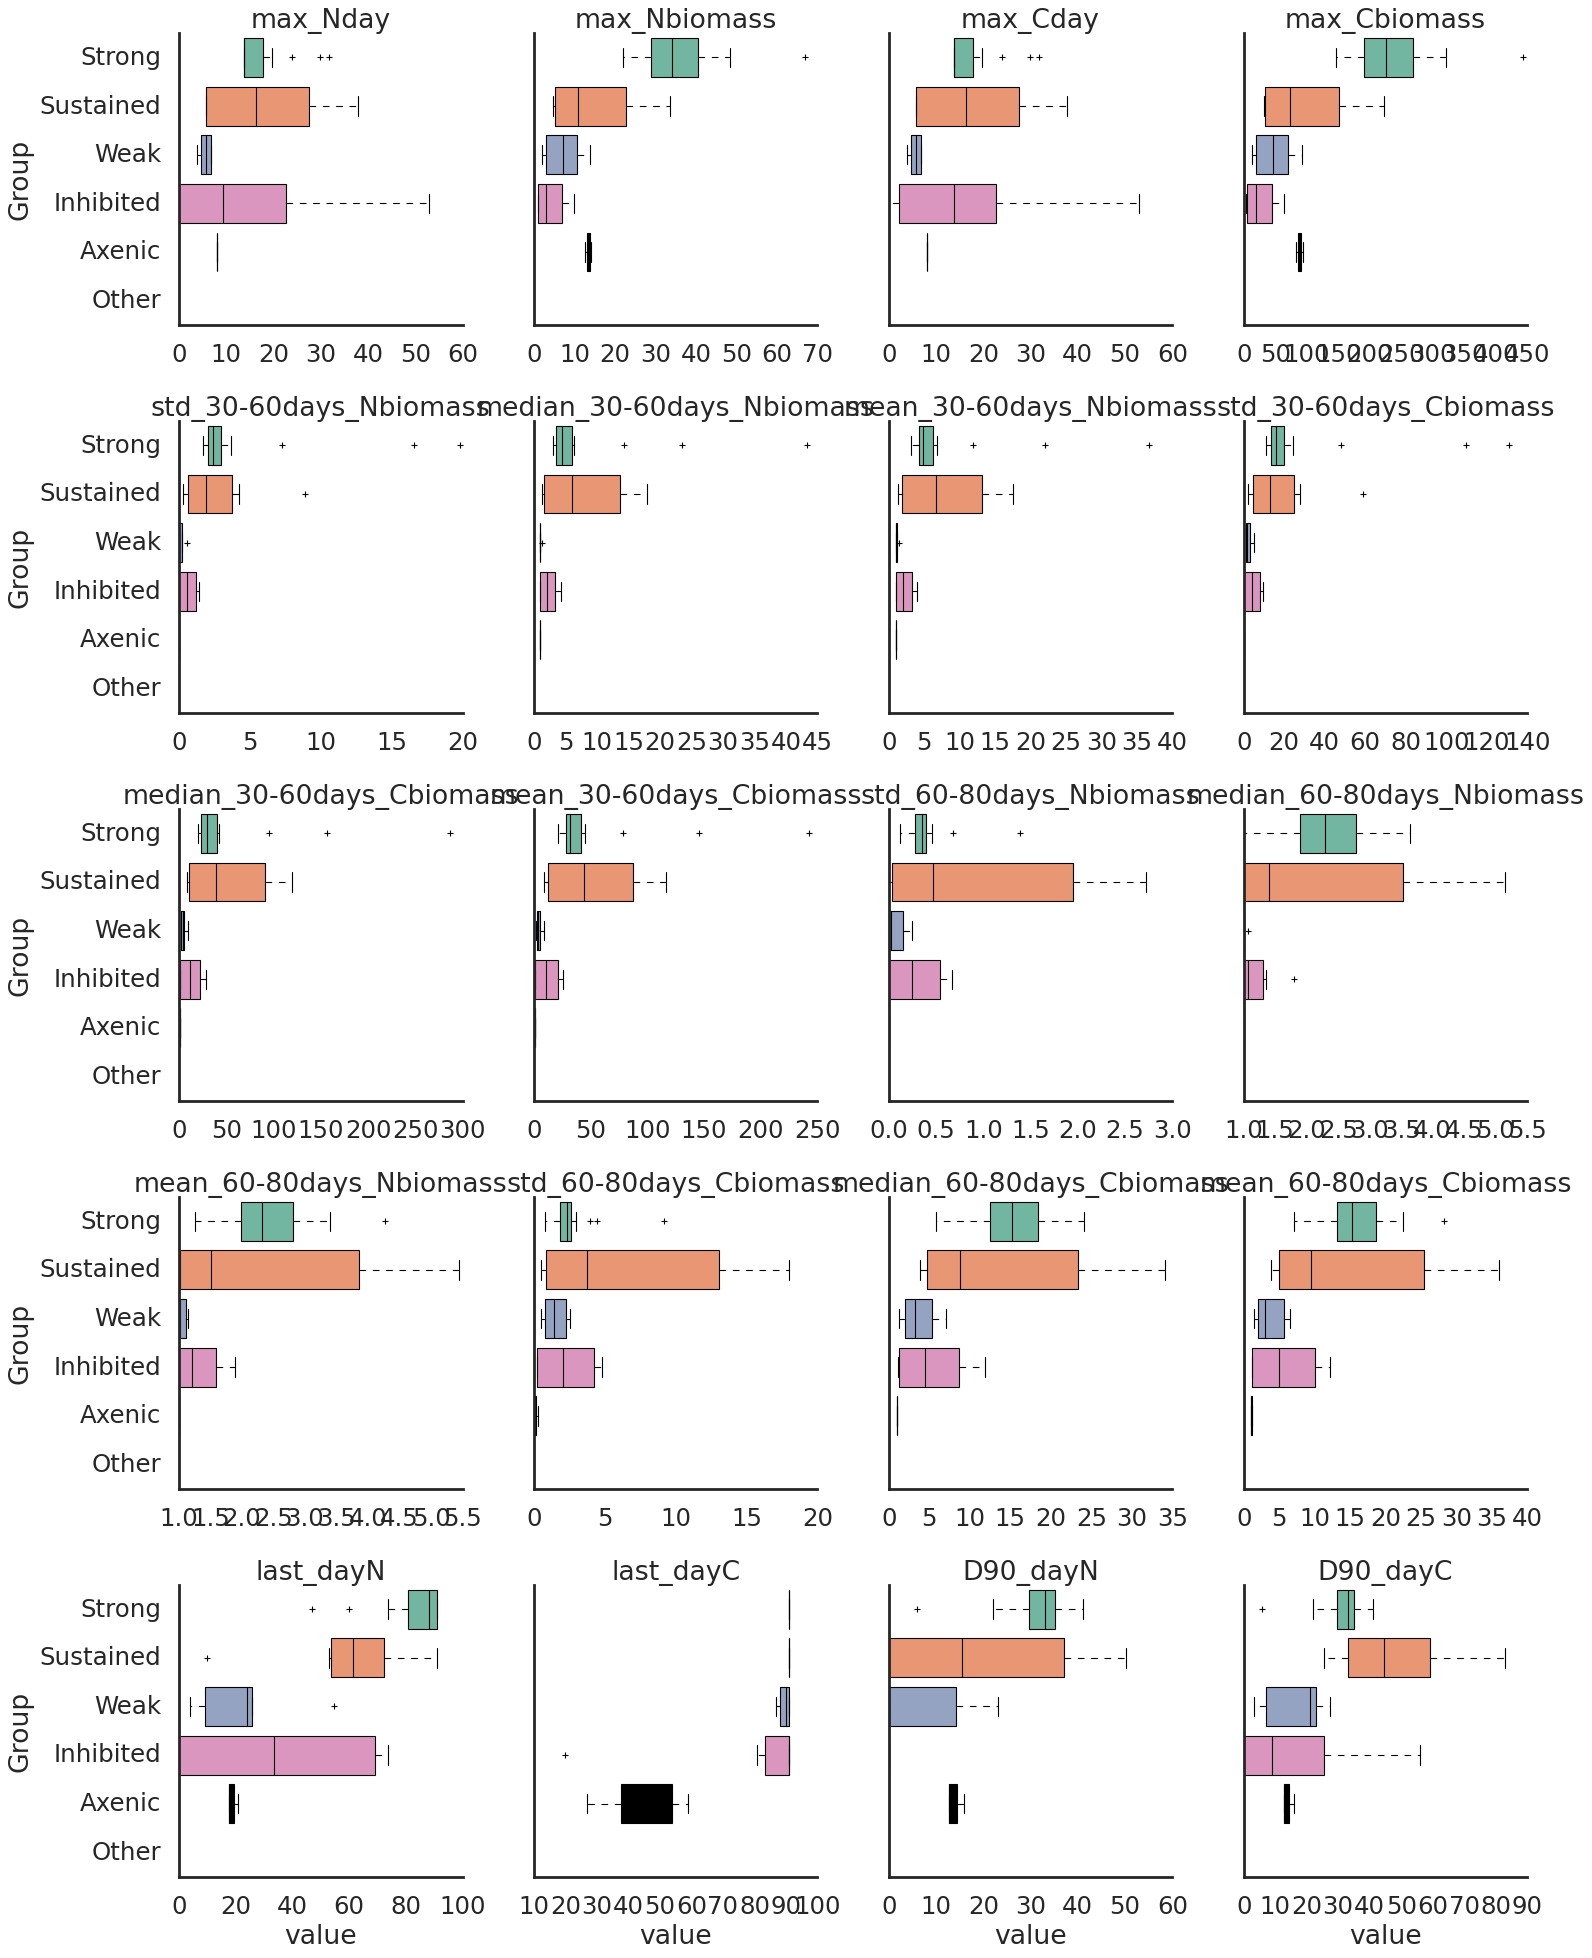

In [120]:
sns.set_context('poster')
sns.catplot(
    data=df_ref_maxday,
    y='Group', x='value', order=gorder,
    col='variable', col_wrap=4,
    kind='box',
    hue='Group', hue_order=gorder, palette=gpalette,
    sharex=False, dodge=False,
).set_titles(col_template='{col_name}')


In [121]:
df_ref_maxday['type'] = 'ref' 
df_ref_maxday['y_pred'] = df_ref_maxday['Group']
df_int_maxday['type'] = 'interpolate' 
df_int_maxday['y_pred'] = df_int_maxday['train_Group']
df_train_maxday['type'] = 'train' 
df_maxday = pd.concat([df_ref_maxday, df_int_maxday,df_train_maxday], ignore_index=True)

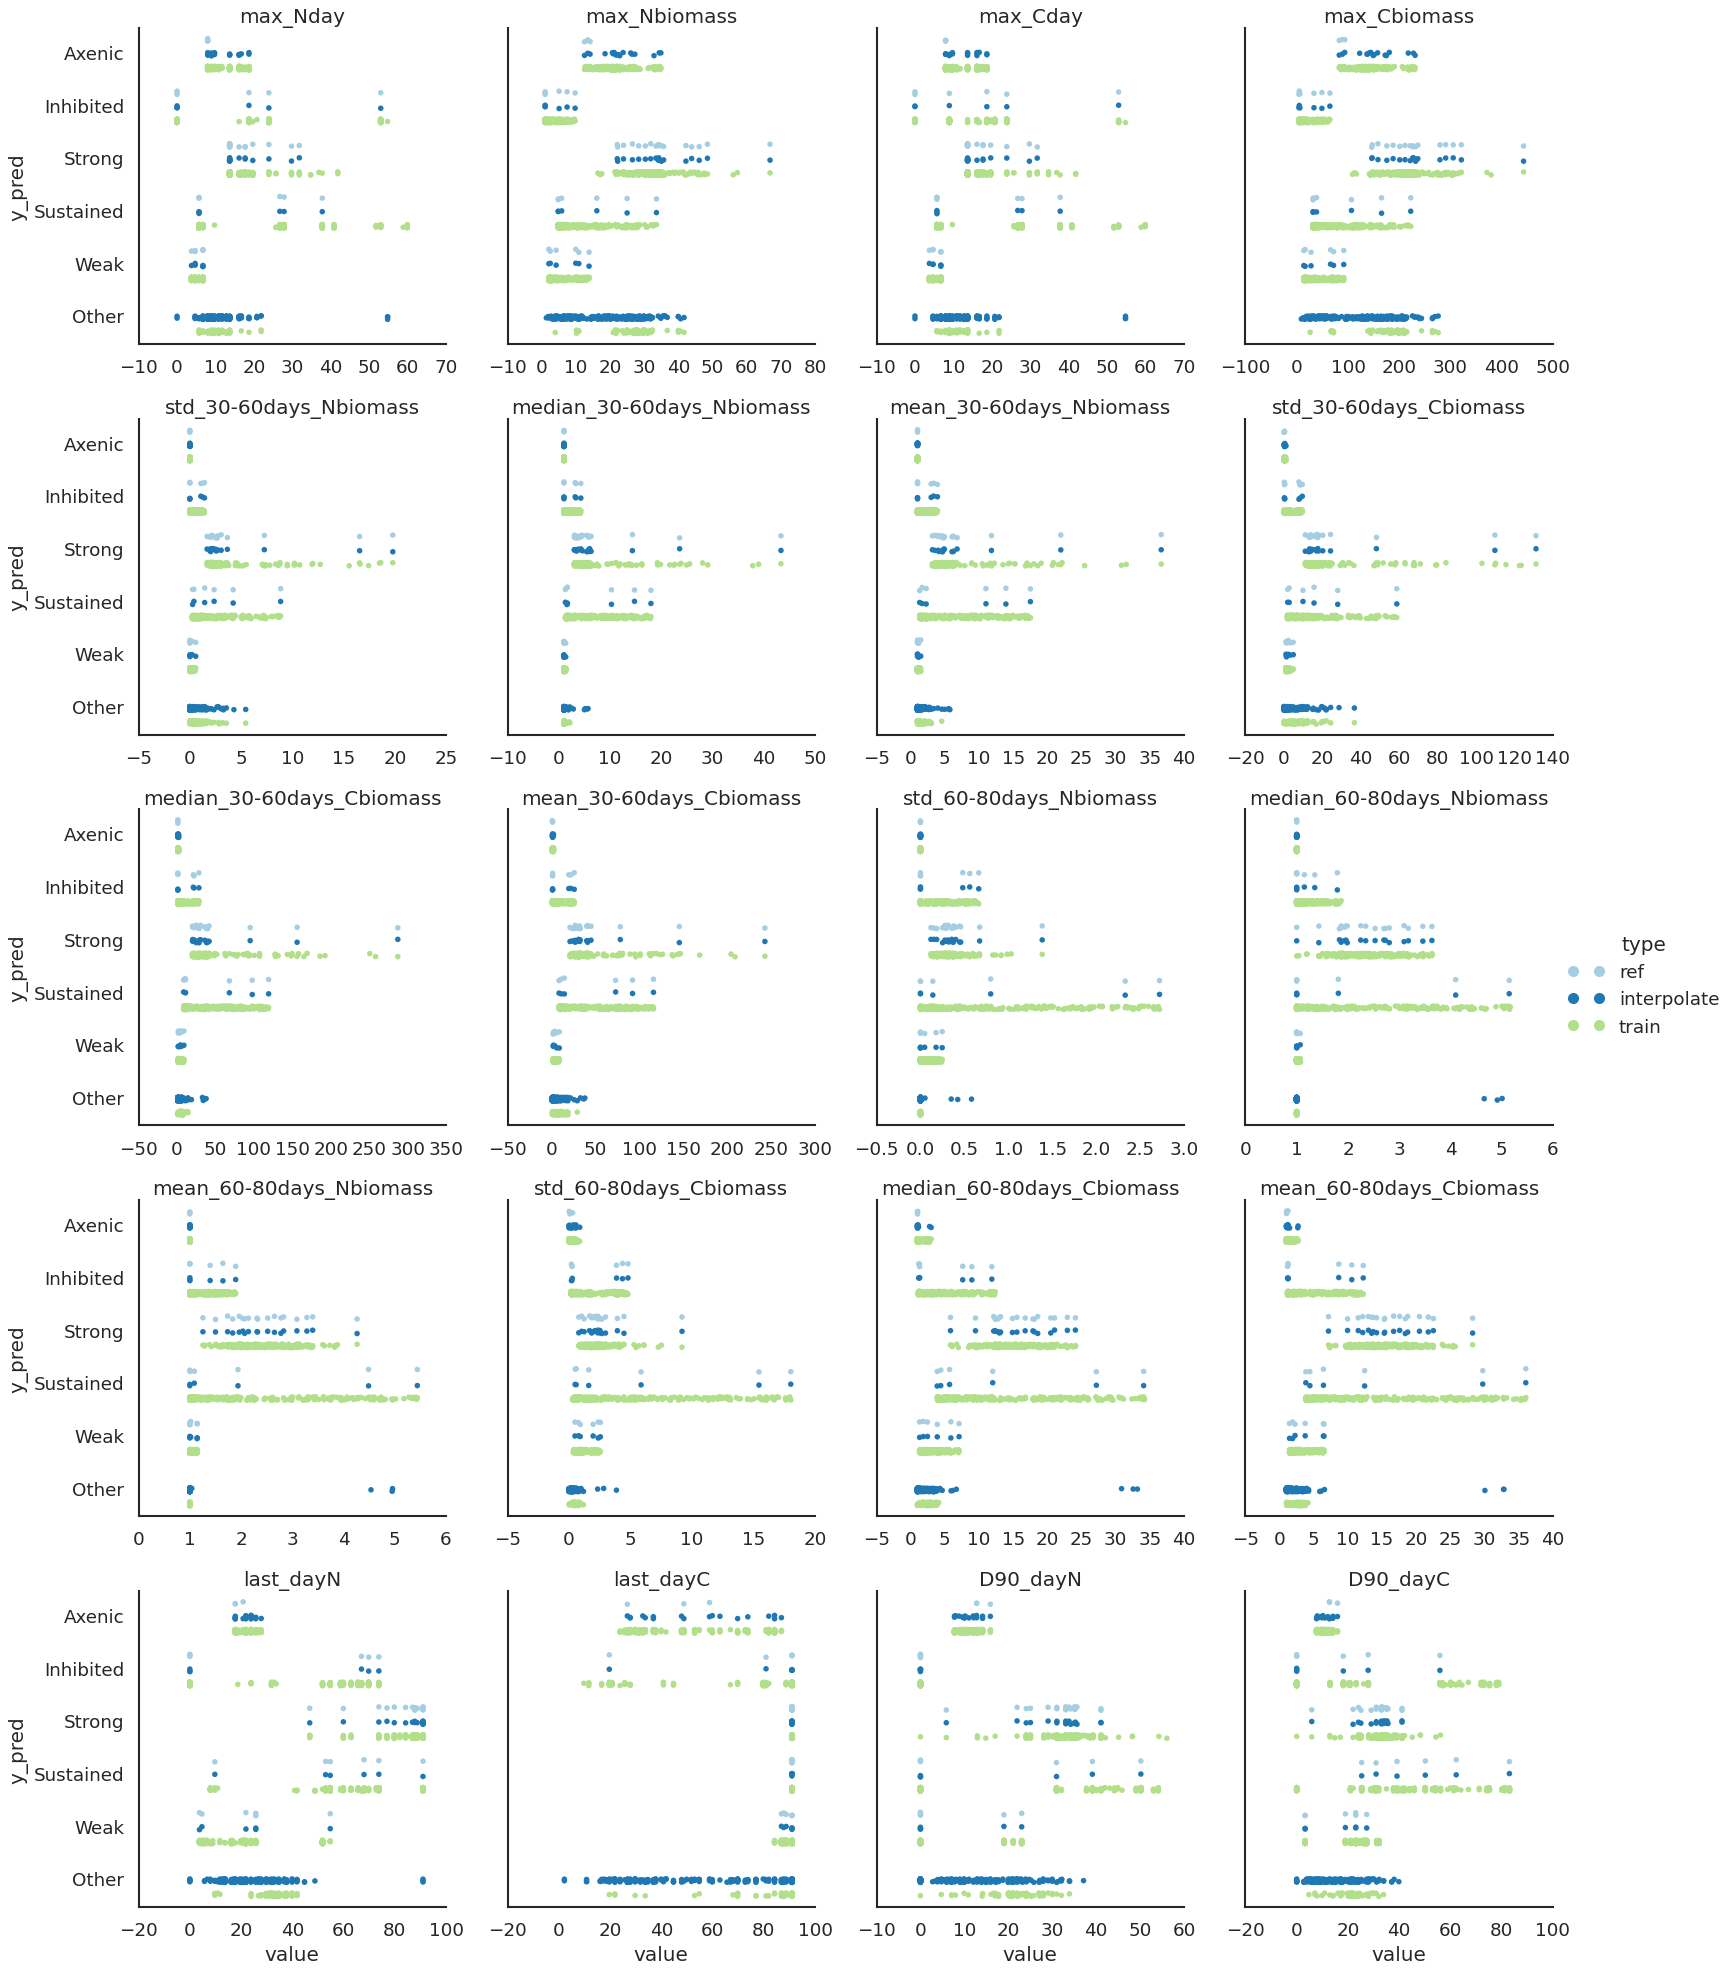

In [122]:
sns.set_context('talk')
sns.catplot(
    data=df_maxday,
    y='y_pred', x='value', #order=gorder,
    col='variable', col_wrap=4, #aspect=2,
    
    #kind='box',
    hue='type', hue_order=['ref', 'interpolate', 'train'], palette='Paired',
    sharex=False, dodge=True,
).set_titles(col_template='{col_name}')


In [123]:
df_maxday.loc[df_maxday.variable.isin(['max_Nbiomass']) & ~df_maxday.y_pred.isin(['Other'])].groupby(['y_pred', 'id'])['value'].max().head(50)

y_pred     id         
Axenic     1              14.149672
           MED4_Ax_Pro    34.881481
           MED4_lowN      27.273063
Inhibited  3               9.774145
           4               1.000000
Strong     5              66.833060
           MED4_1A3       48.512042
           MED4_ATCC      26.555102
           MED4_BS11      35.681378
           MED4_DE        35.028343
           MED4_DE1       33.430197
Sustained  6               5.836478
           7              33.586073
Weak       10             10.857147
           11             13.857494
Name: value, dtype: float64

In [125]:
from joblib import dump, load
dump(stack, 'shading_10CC_ML_classifier.joblib') 

['shading_10CC_ML_classifier.joblib']

In [126]:
df_int_maxday.loc[df_int_maxday.y_pred.isin(['Axenic']) ].Sample.unique()

array(['1A0', '1B0', '1C0', '5x5_30A0', '5x5_30B0', '5x5_30C0',
       'Ax_Media_A4', 'Ax_Media_A5', 'Ax_Media_A6', 'Ax_Media_B4',
       'Ax_Media_B5', 'Ax_Media_B6', 'Ax_Media_C4', 'Ax_Media_C5',
       'Ax_Media_C6', 'Ax_Media_D4', 'Ax_Media_D5', 'Ax_Media_D6'],
      dtype=object)

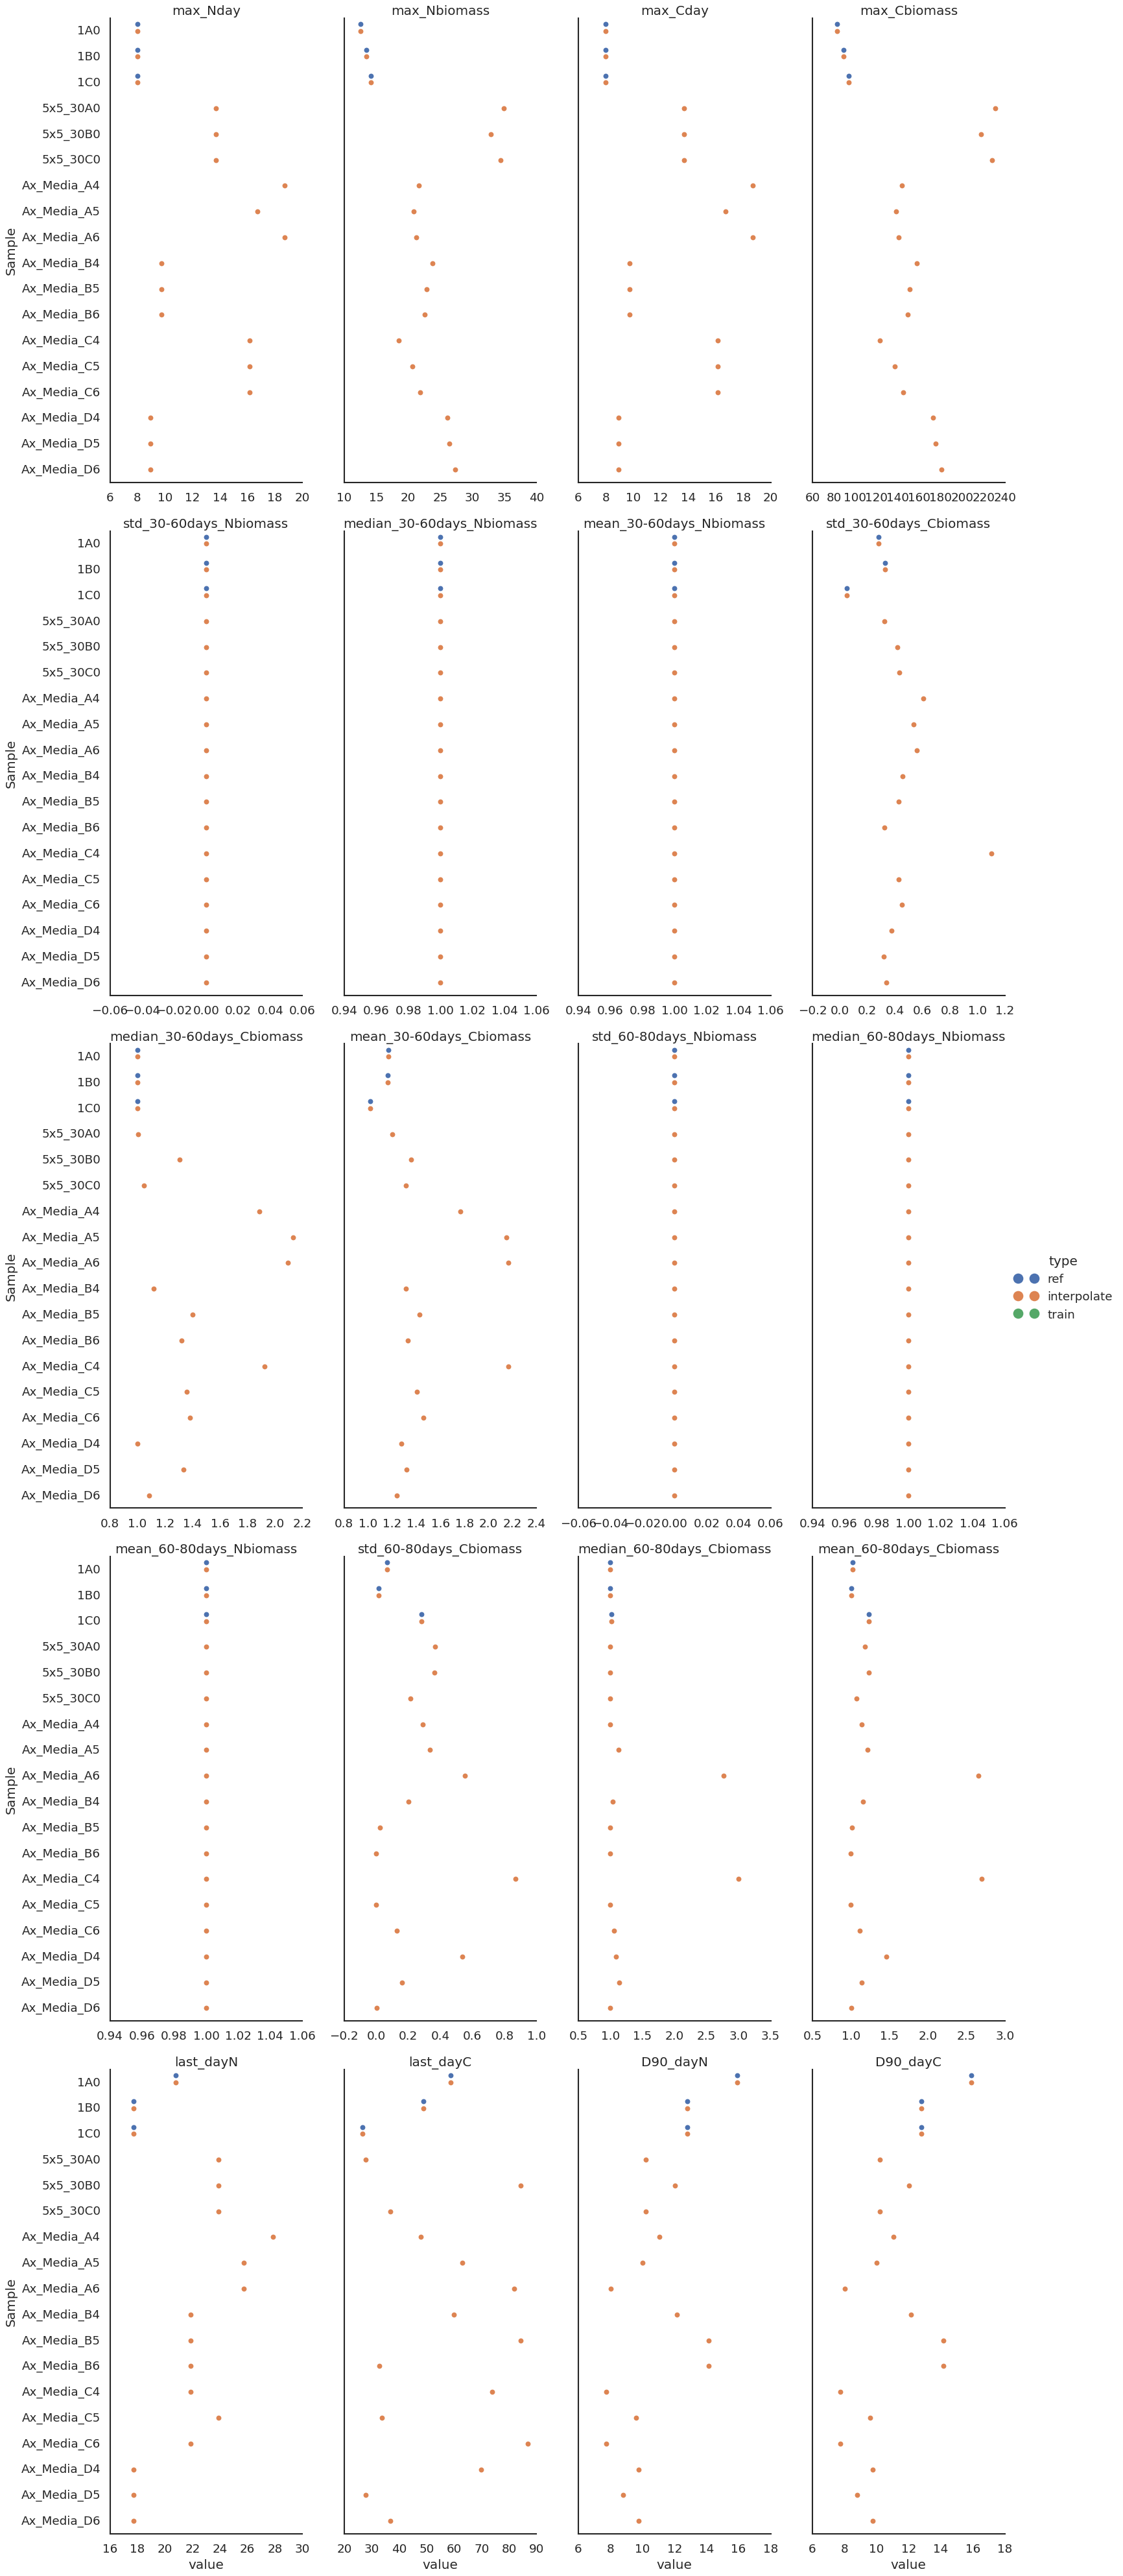

In [127]:
sns.set_context('talk')
sns.catplot(
    data=df_maxday.loc[df_maxday.y_pred.isin(['Axenic']) ],
    y='Sample', x='value', #order=gorder,
    col='variable', col_wrap=4, #aspect=2,
    s=50,
    #kind='box',
    hue='type', #hue_order=['ref', 'train'], palette='Paired',
    sharex=False, dodge=True, height=10, aspect=0.5,
).set_titles(col_template='{col_name}')
